In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata 
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from umap import UMAP

from matplotlib.colors import LinearSegmentedColormap

from scroutines.config_plots import *
from scroutines import powerplots 
from scroutines import pnmf
from scroutines import basicu


In [47]:
outdir    = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results"
outfigdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/"

In [3]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_13239/12491127.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


Class_broad  Doublet  Doublet Score batch  \
AAACGCTCACTTCATT-1-P8_1a-P8   Excitatory    False       0.025713     1   
AAAGGATAGGTGCATG-1-P8_1a-P8   Excitatory    False       0.011883     1   
AAAGGGCCAGTATACC-1-P8_1a-P8   Excitatory    False       0.024667     1   
AAAGTCCCATATACCG-1-P8_1a-P8   Excitatory    False       0.027921     1   
AAAGTCCTCAGATGCT-1-P8_1a-P8   Excitatory    False       0.009527     1   
...                                  ...      ...            ...   ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a         NaN    False       0.042872    11   
TTTGGTTTCTGCCTGT-1-P38_dr_2b         NaN    False       0.007108     2   
TTTGTTGCACCGGTCA-1-P38_dr_2a         NaN    False       0.030928     2   
TTTGTTGGTGGCTAGA-1-P38_dr_2b         NaN    False       0.015884     3   
TTTGTTGTCTATTGTC-1-P38_dr_1a         NaN    False       0.028005     3   

                              leiden  n_counts  n_genes  percent_mito  \
AAACGCTCACTTCATT-1-P8_1a-P8        0   23384.0     4943      0.000128   
AAAGGATAGGTGCATG-1-P8_1a-P8        0   17774.0     4698      0.000169   
AAAGGGCCAGTATACC-1-P8_1a-P8        0   15872.0     4173      0.000126   
AAAGTCCCATATACCG-1-P8_1a-P8        0   20076.0     4761      0.000050   
AAAGTCCTCAGATGCT-1-P8_1a-P8        4   19061.0     4601      0.000000   
...                              ...       ...      ...           ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a       1   11379.0     3568      0.000879   
TTTGGTTTCTGCCTGT-1-P38_dr_2b       1   16050.0     3104      0.000062   
TTTGTTGCACCGGTCA-1-P38_dr_2a       1   13955.0     3739      0.001146   
TTTGTTGGTGGCTAGA-1-P38_dr_2b       4    7272.0     2789      0.000963   
TTTGTTGTCTATTGTC-1-P38_dr_1a       4   11447.0     2959      0.000262   

                                 sample     Type Subclass   cond easitype  \
AAACGCTCACTTCATT-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGGATAGGTGCATG-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGGGCCAGTATACC-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGTCCCATATACCG-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGTCCTCAGATGCT-1-P8_1a-P8       P8_1a  L2/3_BC     L2/3   P8NR   L2/3_C   
...                                 ...      ...      ...    ...      ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a  P38_dr_1a   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGGTTTCTGCCTGT-1-P38_dr_2b  P38_dr_2b   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGTTGCACCGGTCA-1-P38_dr_2a  P38_dr_2a   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGTTGGTGGCTAGA-1-P38_dr_2b  P38_dr_2b   L2/3_2     L2/3  P38DR   L2/3_B   
TTTGTTGTCTATTGTC-1-P38_dr_1a  P38_dr_1a   L2/3_2     L2/3  P38DR   L2/3_B   

                              umap1  umap2 easisample easicond newtype  
AAACGCTCACTTCATT-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGGATAGGTGCATG-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGGGCCAGTATACC-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGTCCCATATACCG-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGTCCTCAGATGCT-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_C  
...                             ...    ...        ...      ...     ...  
TTTGGTTCAGTTGTTG-1-P38_dr_1a    NaN    NaN         1a  2-P38DR  L2/3_B  
TTTGGTTTCTGCCTGT-1-P38_dr_2b    NaN    NaN         2b  2-P38DR  L2/3_B  
TTTGTTGCACCGGTCA-1-P38_dr_2a    NaN    NaN         2a  2-P38DR  L2/3_B  
TTTGTTGGTGGCTAGA-1-P38_dr_2b    NaN    NaN         2b  2-P38DR  L2/3_A  
TTTGTTGTCTATTGTC-1-P38_dr_1a    NaN    NaN         1a  2-P38DR  L2/3_B  

[41048 rows x 18 columns]

In [4]:
adata = anndata.read("../../data/cheng21_cell_scrna/reorganized/allL23_typegenes_Mar29.h5ad")
adata = adata[adata.obs['cond'].isin(['P28NR'])]
genes = adata.var.index.values
conds = adata.obs['cond'].values
types = adata.obs['Type'].values
samps = adata.obs['sample'].values
adata.obs['newtype'] = meta.loc[adata.obs.index, 'newtype']
adata

/tmp/ipykernel_13239/3322965548.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['newtype'] = meta.loc[adata.obs.index, 'newtype']


AnnData object with n_obs × n_vars = 4044 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond', 'easitype', 'umap1', 'umap2', 'newtype'
    obsm: 'X_pca'
    layers: 'log10CP10k', 'zlog10CP10k'

In [5]:
adata_raw = anndata.read("../../data/cheng21_cell_scrna/reorganized/all_L23.h5ad")
adata_raw = adata_raw[adata_raw.obs['cond'].isin(['P28NR'])]
assert np.all(adata_raw.obs.index.values == adata.obs.index.values)
counts = adata_raw.X
allgenes = adata_raw.var.index.values
gi = basicu.get_index_from_array(allgenes, genes)
assert np.all(gi != -1)
counts.shape, gi.shape

((4044, 53801), (286,))

In [6]:
rename = {
    "L2/3_A": "L2/3_A",
    "L2/3_B": "L2/3_B",
    "L2/3_C": "L2/3_C",
    
    "L2/3_1": "L2/3_A",
    "L2/3_2": "L2/3_B",
    "L2/3_3": "L2/3_C",
    
    "L2/3_AB": "L2/3_A",
    "L2/3_BC": "L2/3_C",
}
adata.obs['easitype'] = adata.obs['Type'].apply(lambda x: rename[x])
adata.obs['easisamp'] = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace("3", "2"))

In [7]:
zlognorm = adata.layers['zlog10CP10k']
zlognorm.shape

(4044, 286)

In [8]:
# # use those 286 genes
df = pd.read_csv("../../data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot.csv")
genes_sel = df['gene'].astype(str).values
genes_grp = df['P17on'].astype(str).values
assert np.all(genes_sel == adata.var.index.values)

In [9]:
allcolors = sns.color_palette('tab20c', 20)
allcolors

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [10]:
allcolors2 = sns.color_palette('tab10', 20)
allcolors2

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [11]:
palette = collections.OrderedDict({
#      "P8NR": allcolors[2],
#     "P14NR": allcolors[0],
    
#     "P17NR": allcolors[7],
#     "P21NR": allcolors[6],
    "P28NR": allcolors[5],
    # "P38NR": allcolors[4],
    
    # "P28DR": allcolors[14],
    # "P38DR": allcolors[12],
    
    # "P28DL": allcolors[8],
})

cases = np.array(list(palette.keys()))
cases

array(['P28NR'], dtype='<U5')

In [12]:
palette_types = collections.OrderedDict({
    'L2/3_A': allcolors2[0],
    'L2/3_B': allcolors2[1],
    'L2/3_C': allcolors2[2],
    
    'L2/3_1': allcolors2[0],
    'L2/3_2': allcolors2[1],
    'L2/3_3': allcolors2[2],
    
    'L2/3_AB': allcolors2[0],
    'L2/3_BC': allcolors2[2],
})             

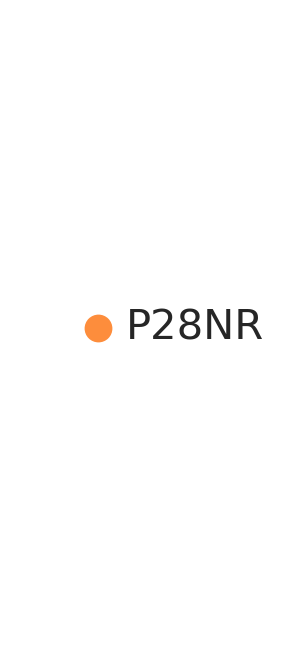

In [13]:
fig, ax = plt.subplots(figsize=(1,4))
for i, (key, item) in enumerate(palette.items()):
    ax.plot(0,     len(palette)-i, 'o', c=item, )
    ax.text(0.02,  len(palette)-i, key, va='center', fontsize=15)
    ax.axis('off')
plt.show()

# heatmap

# give each cell a pseudo-time index

In [14]:
choices1 = sns.color_palette('tab10', 3)
choices1

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

In [15]:
choices2 = sns.color_palette('tab20', 20)
choices2

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [16]:
my_colors = tuple(list(choices1)) #('C0', 'C1', 'C2')
cmap_d1 = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))

my_colors = tuple(list(choices2[6:8])+list(choices2[14:16]))
cmap_d2 = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))

ncell, ngene = zlognorm.shape

In [17]:
# Use P28 ordering
f = '../../results/gene_ptime_P28_L23_Mar27.tsv'
gpt_df = pd.read_csv(f)
gpt = gpt_df['gene_ptime'].values
geneidx = np.argsort(gpt)

In [18]:
# Use ptime from each sample analysis
dfall = []
for case in cases:
    f = f'../../results/cell_ptime_{case}_L23_Mar28.tsv'
    df = pd.read_csv(f, index_col=0)
    df['case'] = case
    dfall.append(df)
dfall = pd.concat(dfall)
assert len(np.intersect1d(dfall.index.values, adata.obs.index.values)) == len(adata.obs.index.values)
dfall

PC1       PC2       PC3       PC4  \
AAACCCAGTTCTCTCG-1-P28_1a-P28   1.146197  5.233500 -2.200451 -3.930217   
AAACGAAAGCAAGGAA-1-P28_1a-P28  -0.518837 -6.410211  1.400165  0.046731   
AAACGCTAGTTTGCTG-1-P28_1a-P28   3.927249  3.636246 -1.236638 -2.775061   
AAACGCTCAACCGTGC-1-P28_1a-P28  11.051399  6.327102  2.314033  1.087070   
AAAGAACAGCGATGGT-1-P28_1a-P28  -3.685992 -2.021548 -0.263423 -2.174867   
...                                  ...       ...       ...       ...   
TTTCGATGTAACAAGT-1-P28_2b-P28  -6.097852 -2.068505 -1.277921  1.154793   
TTTCGATTCCGCTAGG-1-P28_2b-P28  -3.879921  0.587715  1.842610 -2.062828   
TTTGACTTCAGCTTGA-1-P28_2b-P28   1.520209 -1.121137 -0.979946 -1.053952   
TTTGATCTCTTTGCTA-1-P28_2b-P28   0.086317 -1.396976  2.496928 -1.632108   
TTTGTTGCAAGTGATA-1-P28_2b-P28  -4.506055 -4.132748  0.456263 -0.314469   

                                    PC5       PC6       PC7       PC8  \
AAACCCAGTTCTCTCG-1-P28_1a-P28 -0.111922  1.029476  2.120738 -0.133120   
AAACGAAAGCAAGGAA-1-P28_1a-P28 -0.776028 -3.155421 -0.413253 -1.502912   
AAACGCTAGTTTGCTG-1-P28_1a-P28 -0.591087 -0.833479 -0.331241 -0.631949   
AAACGCTCAACCGTGC-1-P28_1a-P28 -1.128625 -2.499452  1.621848 -0.682862   
AAAGAACAGCGATGGT-1-P28_1a-P28  0.280566 -1.501202  1.067050 -2.433449   
...                                 ...       ...       ...       ...   
TTTCGATGTAACAAGT-1-P28_2b-P28 -1.460764  0.536935  0.480625 -1.756502   
TTTCGATTCCGCTAGG-1-P28_2b-P28  1.118867 -1.963338 -1.663969  1.985066   
TTTGACTTCAGCTTGA-1-P28_2b-P28  0.388502 -1.972154 -1.373765  0.537937   
TTTGATCTCTTTGCTA-1-P28_2b-P28 -0.728758  1.120321 -1.356783  2.749665   
TTTGTTGCAAGTGATA-1-P28_2b-P28  0.450936  0.393822 -0.826318 -0.771271   

                                    PC9      PC10  ...      PC47      PC48  \
AAACCCAGTTCTCTCG-1-P28_1a-P28  1.024665 -0.389146  ...  1.978474 -0.286617   
AAACGAAAGCAAGGAA-1-P28_1a-P28  0.131655  1.822501  ... -0.062452  0.032961   
AAACGCTAGTTTGCTG-1-P28_1a-P28 -0.294642  0.106549  ...  1.773346 -1.584922   
AAACGCTCAACCGTGC-1-P28_1a-P28  1.584786 -1.397497  ... -0.819814  0.101668   
AAAGAACAGCGATGGT-1-P28_1a-P28 -1.738505 -2.509742  ... -0.647676  1.347891   
...                                 ...       ...  ...       ...       ...   
TTTCGATGTAACAAGT-1-P28_2b-P28  2.819243 -1.049271  ...  0.639172  1.214040   
TTTCGATTCCGCTAGG-1-P28_2b-P28 -1.417166 -0.196579  ... -0.408145 -0.553839   
TTTGACTTCAGCTTGA-1-P28_2b-P28  2.653519  1.364097  ... -0.846008  0.359179   
TTTGATCTCTTTGCTA-1-P28_2b-P28  1.485902 -0.692504  ... -0.265433 -0.473949   
TTTGTTGCAAGTGATA-1-P28_2b-P28 -2.148066  0.282881  ...  0.416597  0.071702   

                                   PC49      PC50    type    samp     umap1  \
AAACCCAGTTCTCTCG-1-P28_1a-P28 -0.203951 -1.760803  L2/3_C  P28_1a  4.637853   
AAACGAAAGCAAGGAA-1-P28_1a-P28 -0.855531  0.248408  L2/3_B  P28_1a  2.909217   
AAACGCTAGTTTGCTG-1-P28_1a-P28 -0.513986 -0.910176  L2/3_C  P28_1a  5.585671   
AAACGCTCAACCGTGC-1-P28_1a-P28 -0.897487 -1.715879  L2/3_C  P28_1a  7.935419   
AAAGAACAGCGATGGT-1-P28_1a-P28  2.053722 -2.115304  L2/3_B  P28_1a  1.631243   
...                                 ...       ...     ...     ...       ...   
TTTCGATGTAACAAGT-1-P28_2b-P28 -0.829636  0.281839  L2/3_B  P28_2b  0.845014   
TTTCGATTCCGCTAGG-1-P28_2b-P28  0.328499  0.043187  L2/3_B  P28_2b  1.892715   
TTTGACTTCAGCTTGA-1-P28_2b-P28  0.883551  0.995568  L2/3_B  P28_2b  4.296497   
TTTGATCTCTTTGCTA-1-P28_2b-P28  0.330839  0.489600  L2/3_B  P28_2b  3.047245   
TTTGTTGCAAGTGATA-1-P28_2b-P28  0.698601  0.798913  L2/3_B  P28_2b  1.403328   

                                  umap2     ptime   case  
AAACCCAGTTCTCTCG-1-P28_1a-P28  3.125097  0.602956  P28NR  
AAACGAAAGCAAGGAA-1-P28_1a-P28 -0.441508  0.591331  P28NR  
AAACGCTAGTTTGCTG-1-P28_1a-P28  3.194621  0.686032  P28NR  
AAACGCTCAACCGTGC-1-P28_1a-P28  3.440466  0.951908  P28NR  
AAAGAACAGCGATGGT-1-P28_1a-P28  1.960149  0.522896  P28NR  
...                            

In [20]:
def plot(zlognorm, cellidx, geneidx, types, genes_grp, case,
         vmax=3, vmin=-3, vcenter=0,
         figsize=(12,6), xticklabels=1000, yticklabels=100, hratio=20, vratio=10):
    """
    """
    mosaic = ("B"+"A"*hratio+"\n")*vratio + "."+"C"*hratio
    # print(mosaic)
    fig, axdict = plt.subplot_mosaic(mosaic, figsize=figsize)
    fig.suptitle(case)
    ax = axdict['A']
    sns.heatmap(zlognorm[cellidx][:,geneidx].T,
                xticklabels=False,
                yticklabels=False,
                cbar_kws=dict(shrink=0.3, label='zscore log10CP10k', aspect=10),
                center=vcenter,
                vmax=vmax,
                vmin=vmin,
                cmap='coolwarm',
                rasterized=True,
                ax=ax,
               )
    
    ax = axdict['B']
    sns.heatmap(pd.factorize(genes_grp[geneidx], sort=True)[0].reshape(-1,1), 
                xticklabels=False,
                yticklabels=yticklabels,
                cmap=cmap_d1,
                cbar=False,
                rasterized=True,
                ax=ax, 
               )
    ax.set_ylabel('Genes')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

    ax = axdict['C']
    sns.heatmap(pd.factorize(types[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=xticklabels,
                yticklabels=False,
                cmap=cmap_d1,
                cbar_kws=dict(ticks=[0,1,2], shrink=2, aspect=5),
                rasterized=True,
                ax=ax, 
               )
    ax.set_xlabel('Cells')
    fig.axes[-1].set_yticklabels(['A','B','C'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

    fig.subplots_adjust(hspace=0.4)
    return fig, axdict
    # fig.suptitle(sample)
    # powerplots.savefig_autodate(fig, os.path.join(outdir_fig, f'heatmap_{sample}_v3.pdf'))
    # plt.show()

In [21]:
def plot2(zlognorm, cellidx, geneidx, types, genes_grp, case, samps,
         vmax=3, vmin=-3, vcenter=0,
         figsize=(12,6), xticklabels=1000, yticklabels=100, hratio=20, vratio=10):
    """
    """
    mosaic = ("B"+"A"*hratio+"\n")*vratio + ("."+"C"*hratio+"\n") + ("."+"D"*hratio+"\n")
    # print(mosaic)
    fig, axdict = plt.subplot_mosaic(mosaic, figsize=figsize)
    fig.suptitle(case)
    ax = axdict['A']
    sns.heatmap(zlognorm[cellidx][:,geneidx].T,
                xticklabels=False,
                yticklabels=False,
                cbar_kws=dict(shrink=0.3, label='zscore log10CP10k', aspect=10),
                center=vcenter,
                vmax=vmax,
                vmin=vmin,
                cmap='coolwarm',
                rasterized=True,
                ax=ax,
               )
    
    ax = axdict['B']
    sns.heatmap(pd.factorize(genes_grp[geneidx], sort=True)[0].reshape(-1,1), 
                xticklabels=False,
                yticklabels=yticklabels,
                cmap=cmap_d1,
                cbar=False,
                rasterized=True,
                ax=ax, 
               )
    ax.set_ylabel('Genes')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    
    ax = axdict['C']
    sns.heatmap(pd.factorize(types[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=False,
                yticklabels=False,
                cmap=cmap_d1,
                cbar_kws=dict(ticks=[0,1,2], shrink=1.2, aspect=3, label='type'),
                rasterized=True,
                ax=ax, 
               )
    fig.axes[-1].set_yticklabels(['A','B','C'], fontsize=10)
    fig.axes[-1].set_ylabel(fig.axes[-1].get_ylabel(), rotation=0, ha='left')

    ax = axdict['D']
    sns.heatmap(pd.factorize(samps[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=xticklabels,
                yticklabels=False,
                cmap=cmap_d2,
                cbar_kws=dict(ticks=[], shrink=1.2, aspect=3, label='sample'),
                rasterized=True,
                ax=ax, 
               )
    ax.set_xlabel('Cells')
    fig.axes[-1].set_ylabel(fig.axes[-1].get_ylabel(), rotation=0, ha='left')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

    fig.subplots_adjust(hspace=0.4)
    return fig, axdict
    # fig.suptitle(sample)
    # powerplots.savefig_autodate(fig, os.path.join(outdir_fig, f'heatmap_{sample}_v3.pdf'))
    # plt.show()

In [22]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigtypes_new = []

ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    zlognorm_sub = zlognorm[cellsidx_sub]
    
    # order cells
    cellidx = np.argsort(dfall_sub['ptime'].values)
    types     = adata_sub.obs['easitype'].values
    types_new = adata_sub.obs['newtype'].values 
    
    # update 
    bigmat.append(zlognorm_sub[cellidx])
    
    # get labels
    bigtypes.append(types[cellidx])
    bigtypes_new.append(types_new[cellidx])
    
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigtypes = np.hstack(bigtypes)
bigtypes_new = np.hstack(bigtypes_new)
bigmat.shape

(4044, 286)

In [23]:
print(np.percentile(bigmat, [0,5,95,100]))
# sns.boxplot(np.ravel(bigmat))

[-4.38444328 -0.97942442  1.88250252 10.66612148]


[-4.38444328 -0.97942442  1.88250252 10.66612148]


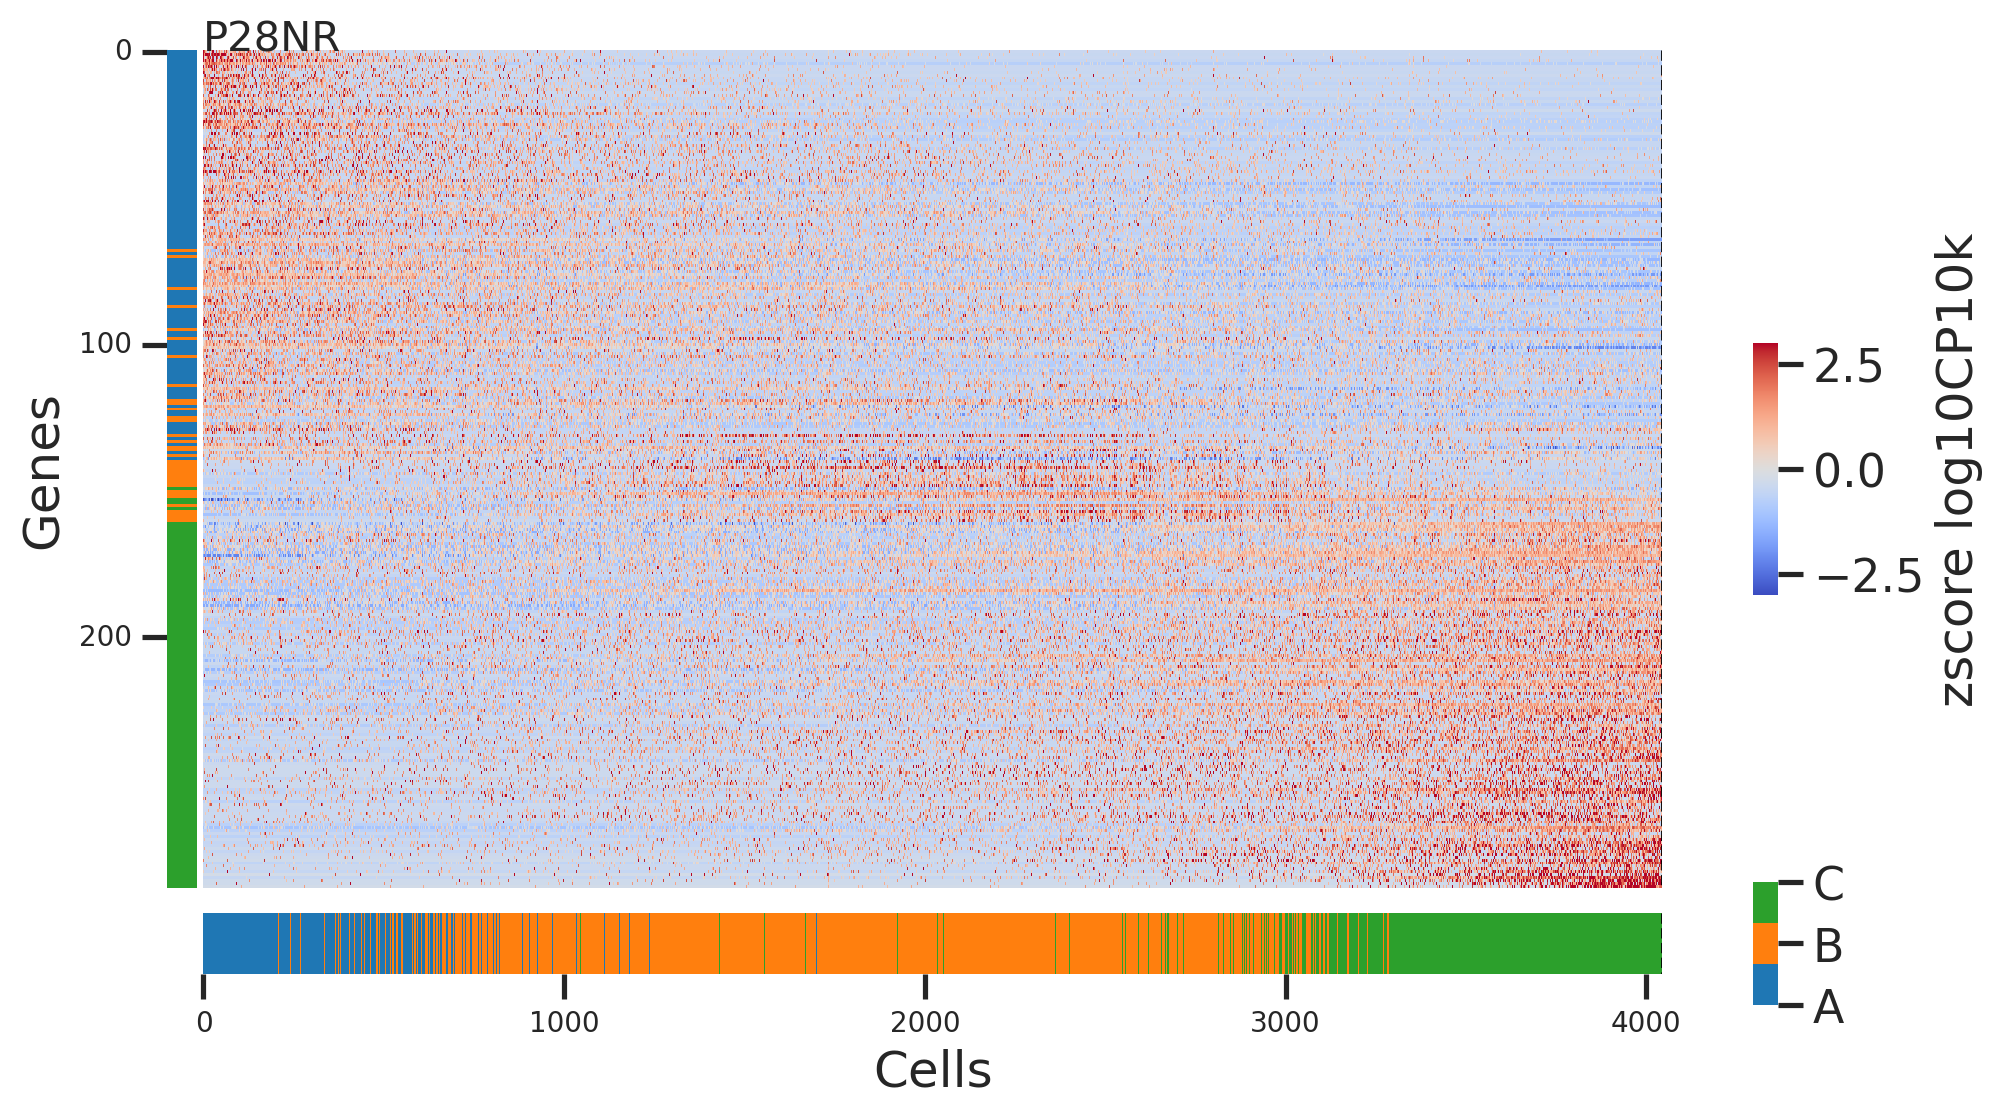

In [30]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot(bigmat, np.arange(len(bigmat)), geneidx, bigtypes, genes_grp, "",
                   figsize=(12,6), xticklabels=1000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

[-4.38444328 -0.97942442  1.88250252 10.66612148]
saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/bigmat_2023-10-18.pdf


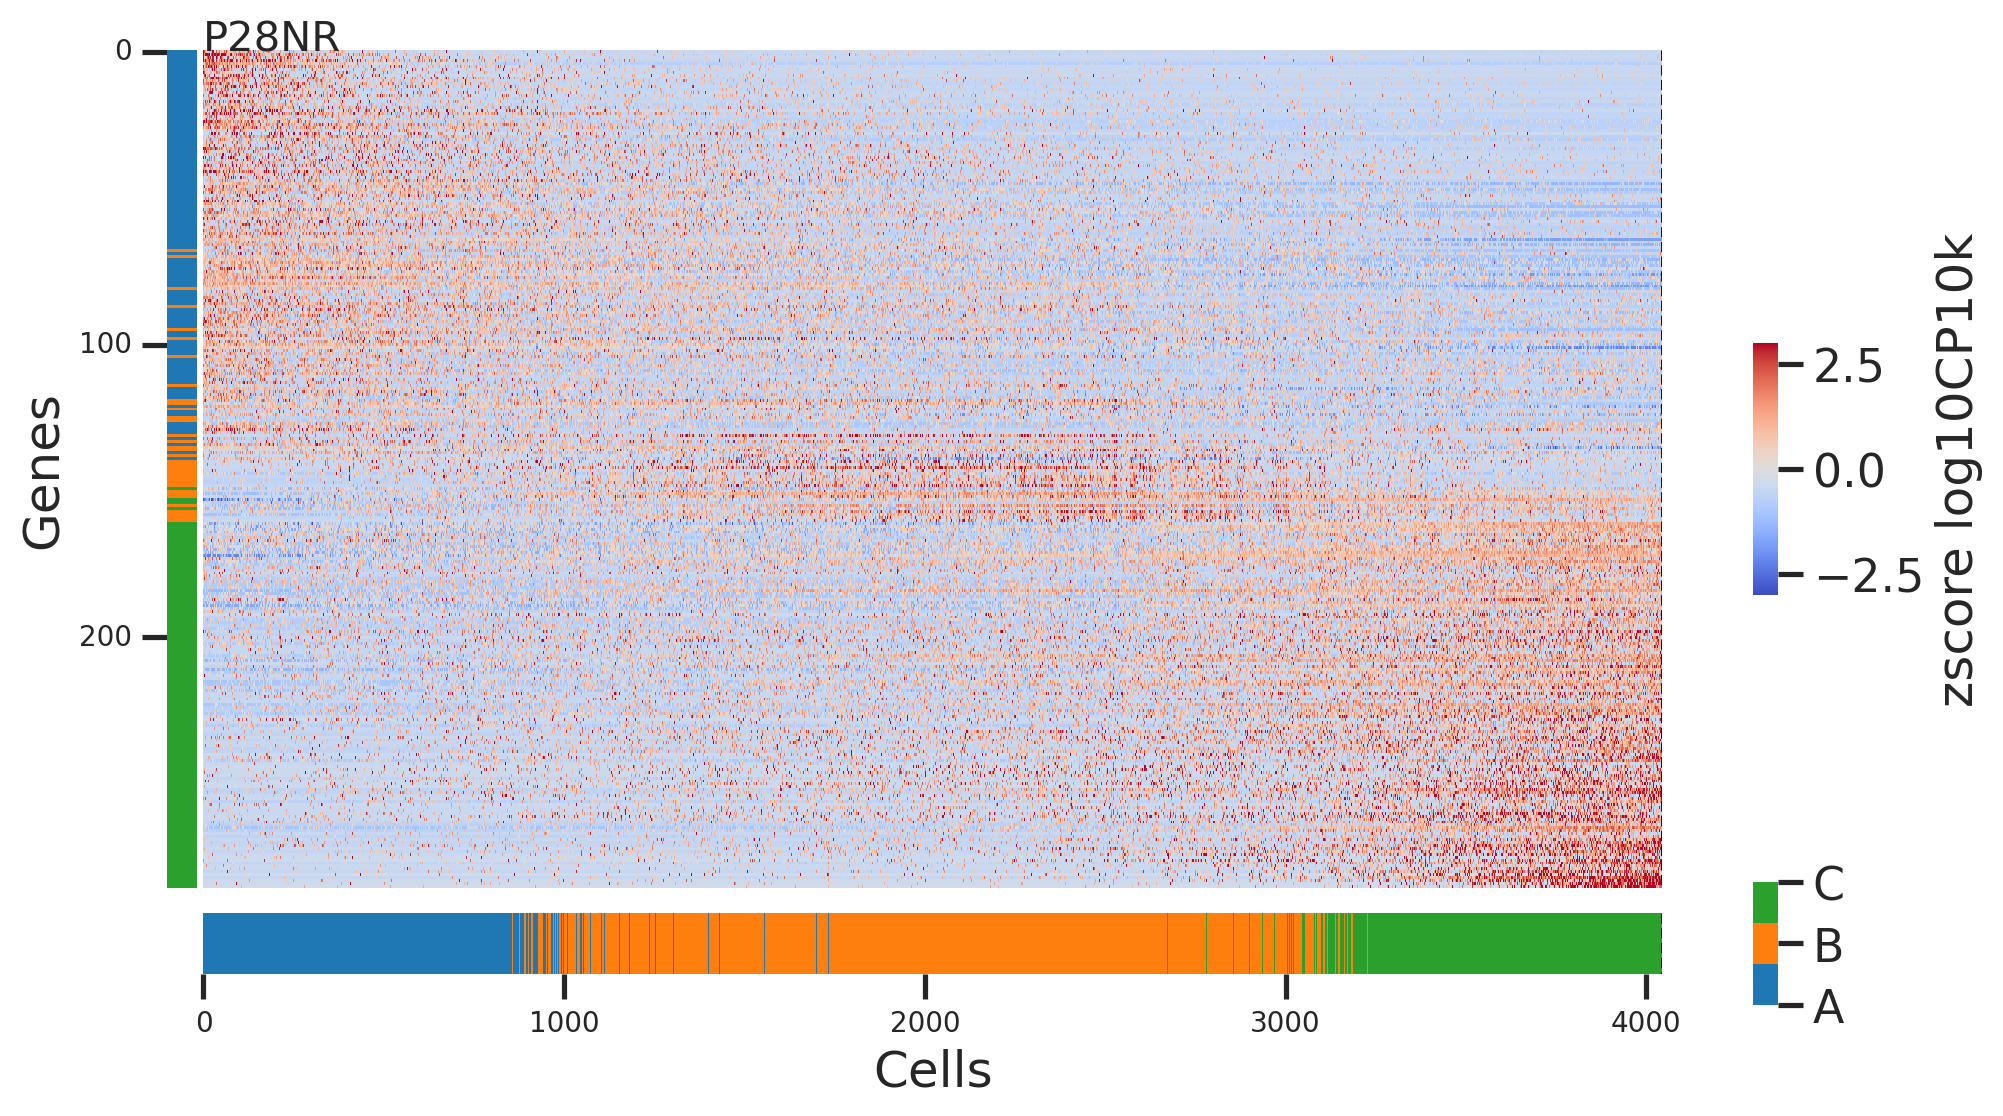

In [51]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot(bigmat, np.arange(len(bigmat)), geneidx, bigtypes_new, genes_grp, "",
                   figsize=(12,6), xticklabels=1000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
    
output = os.path.join(outfigdir, "bigmat.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

In [52]:
def shuff_genes(mat, seed=0):
    """
    shuffle each column independently
    
    if cell by gene as input; it will shuffle each gene independently across cells
    """
    rng = np.random.default_rng(seed=seed)
    mat_shuff = rng.permuted(mat, axis=0)
    return mat_shuff

def shuff_genes_per_type(data, types):
    """data: cell by gene
    type: cell labels
    """
    data_tshuff = data.copy()
    idx, lbl = pd.factorize(types)
    for i in range(len(lbl)):
        data_tshuff[idx==i] = shuff_genes(data[idx==i])
    return data_tshuff

In [53]:
# shuffle #  within each type
bigmat_shuff = shuff_genes(bigmat) 

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/bigmat_shuff_2023-10-18.pdf


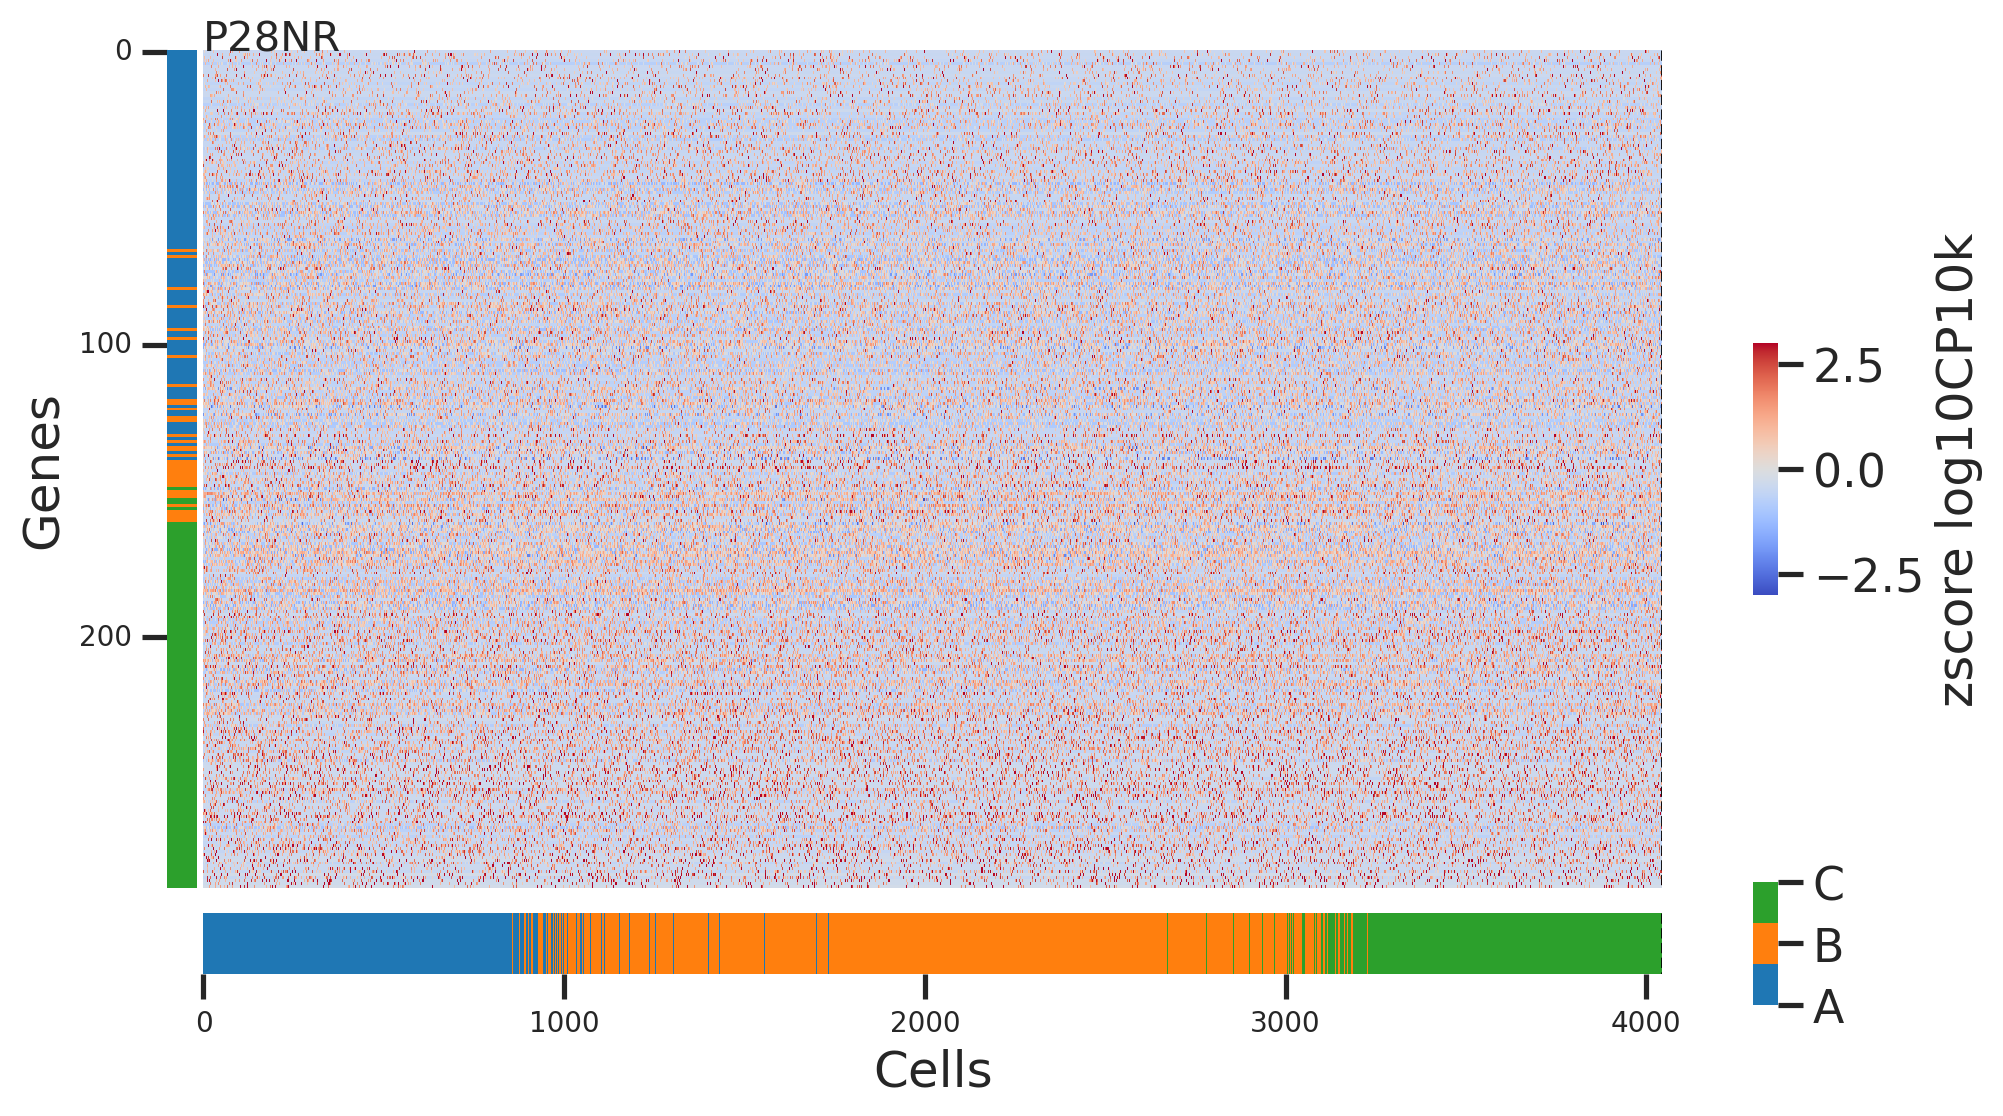

In [54]:
plotmat = bigmat_shuff
fig, axdict = plot(plotmat, np.arange(len(plotmat)), geneidx, bigtypes_new, genes_grp, "",
                   figsize=(12,6), xticklabels=1000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, plotmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
output = os.path.join(outfigdir, "bigmat_shuff.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

In [55]:
# shuffle #  within each type
bigmat_tshuff = shuff_genes_per_type(bigmat, bigtypes_new) 

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/bigmat_tshuff_2023-10-18.pdf


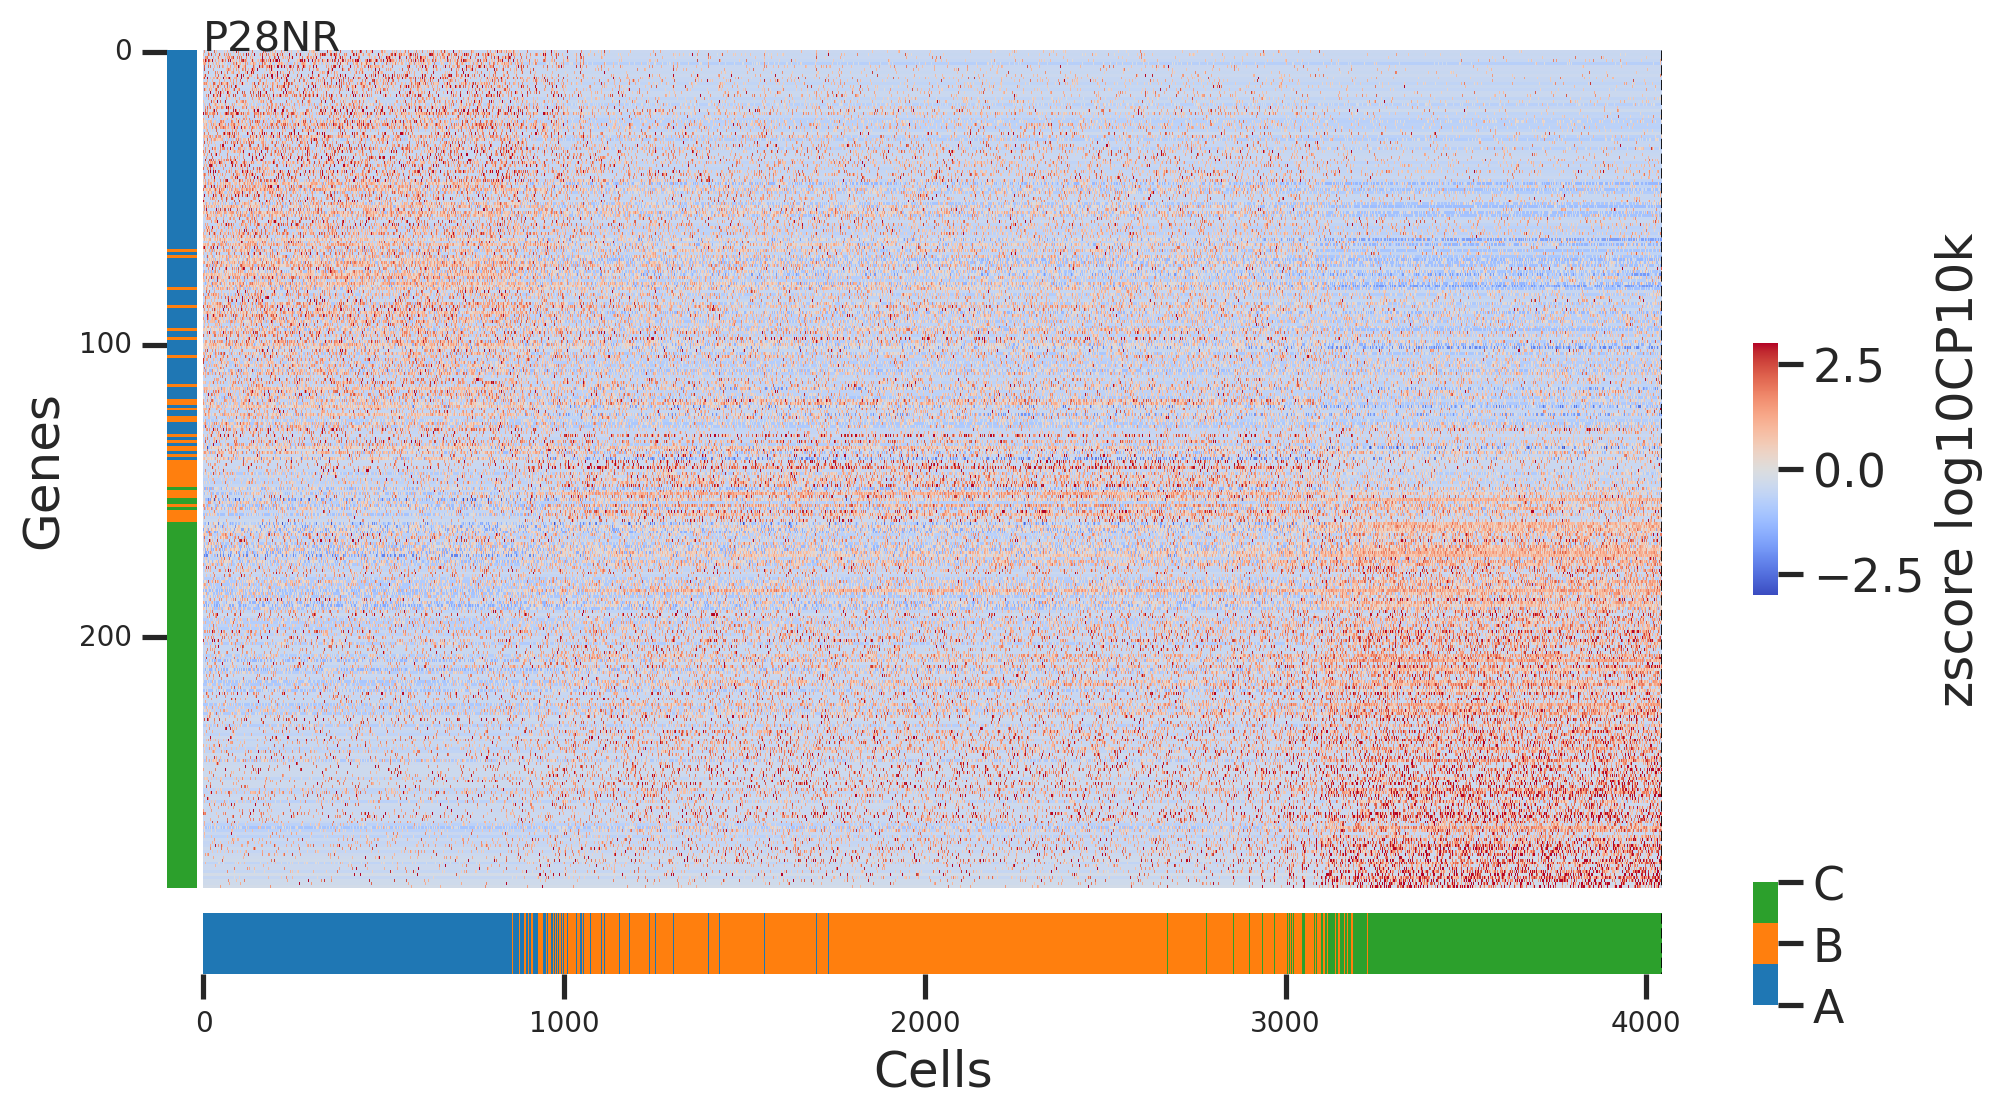

In [56]:
plotmat = bigmat_tshuff
fig, axdict = plot(plotmat, np.arange(len(plotmat)), geneidx, bigtypes_new, genes_grp, "",
                   figsize=(12,6), xticklabels=1000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, plotmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
output = os.path.join(outfigdir, "bigmat_tshuff.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

# Quantify this 
- expression weighted by ptime

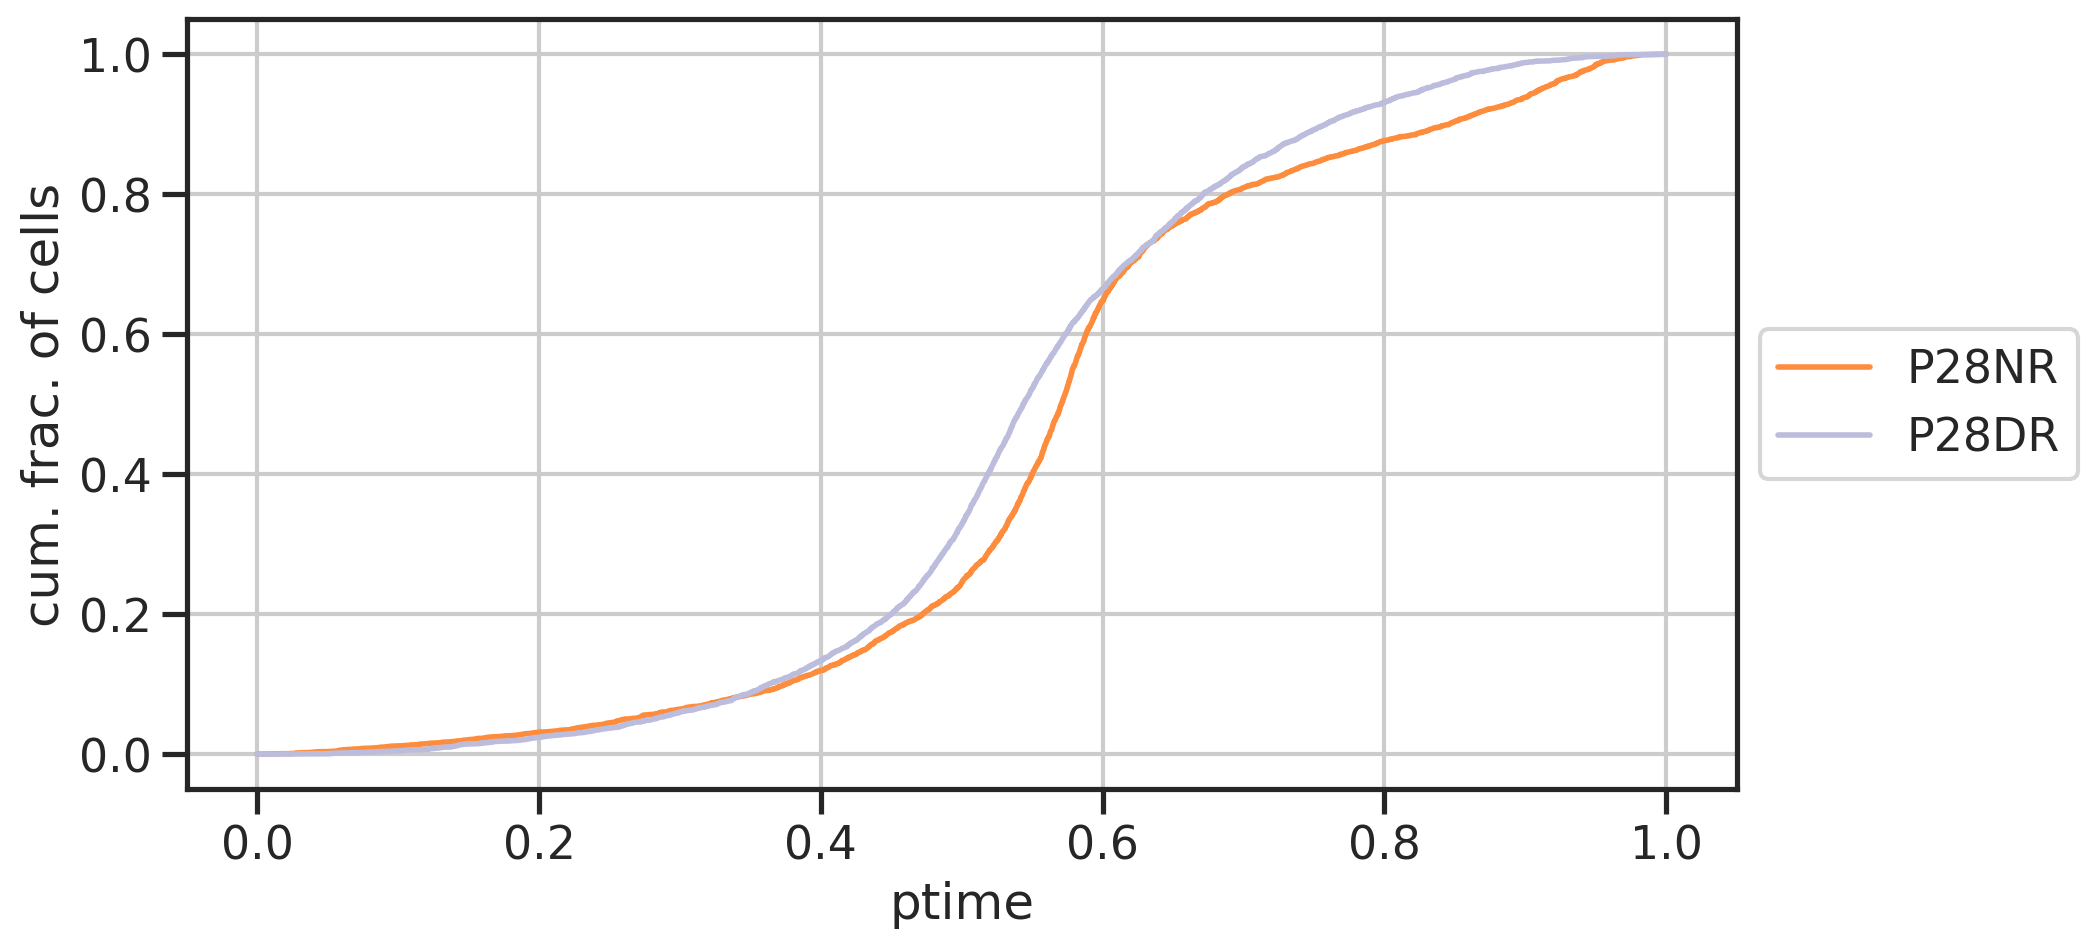

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
for case in cases:
    adata_sub = adata[adata.obs['cond']==case]
    ptime = dfall.loc[adata_sub.obs.index, 'ptime'].values
    ax.plot(np.sort(ptime), np.arange(len(ptime))/len(ptime), label=case, color=palette[case], linewidth=2)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax.set_xlabel("ptime")
ax.set_ylabel("cum. frac. of cells")
plt.show()

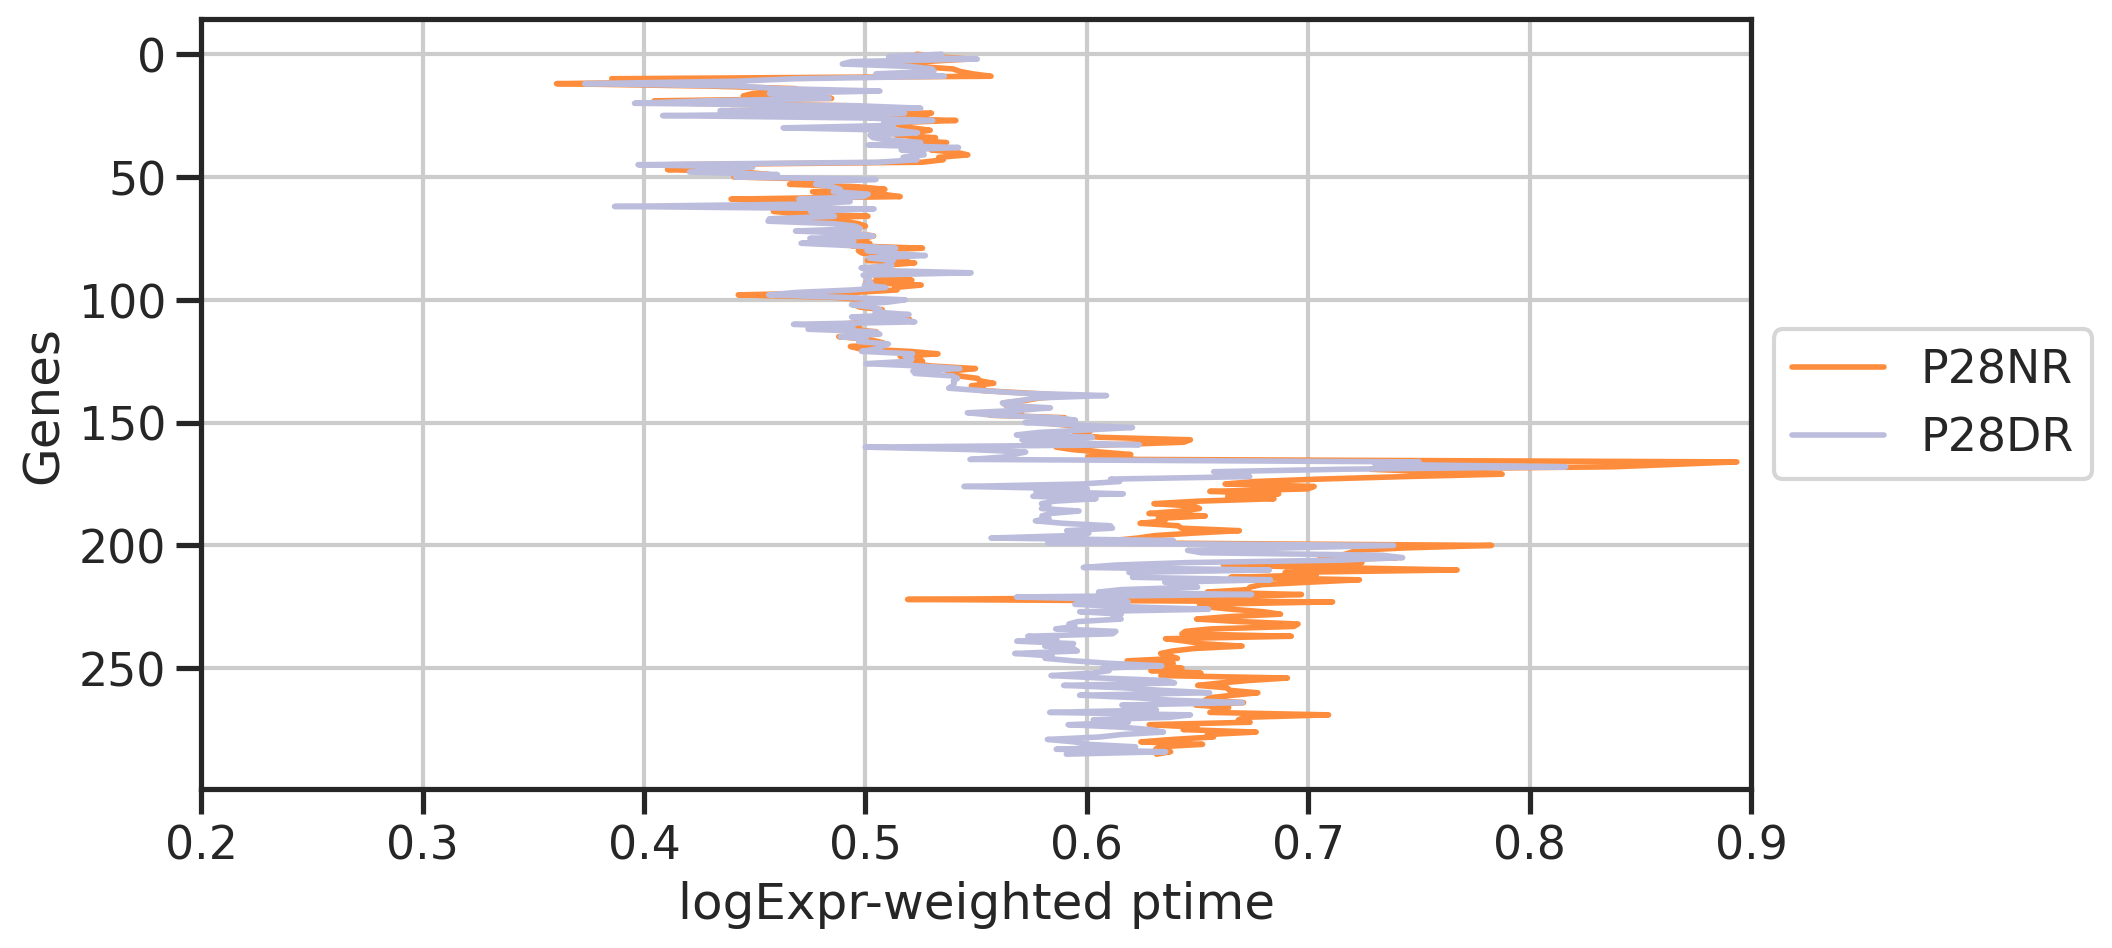

In [26]:
# adata.obs
fig, ax = plt.subplots(figsize=(10,5))
for case in cases:
    adata_sub = adata[adata.obs['cond']==case]
    zexpr = np.array(adata_sub.layers['zlog10CP10k'])
    wexpr = np.exp(zexpr)
    wexpr = wexpr/np.sum(wexpr, axis=0)
    corrd = dfall.loc[adata_sub.obs.index, 'ptime'].values
    
    gcrrd = wexpr.T.dot(corrd)
    ax.plot(gcrrd, np.arange(ngene), label=case, color=palette[case], linewidth=2)
    
ax.invert_yaxis()
ax.set_xlim([0.2,0.9])
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax.set_xlabel('logExpr-weighted ptime')
ax.set_ylabel('Genes')
plt.show()

# Specific genes

In [27]:
genes_subsel = [
    'Cdh13', 
    'Adamts2', 
    
    'Trpc6', 
    'Baz1a', 
    
    'Chrm2', 
    'Grik3', 
]
genes_grp_subsel = np.array([
    'A', 'A', 
    'B', 'B',
    'C', 'C',
])
gidx_subsel = basicu.get_index_from_array(genes_sel, genes_subsel)
gidx_subsel


array([ 11,  10, 137, 149, 200, 167])

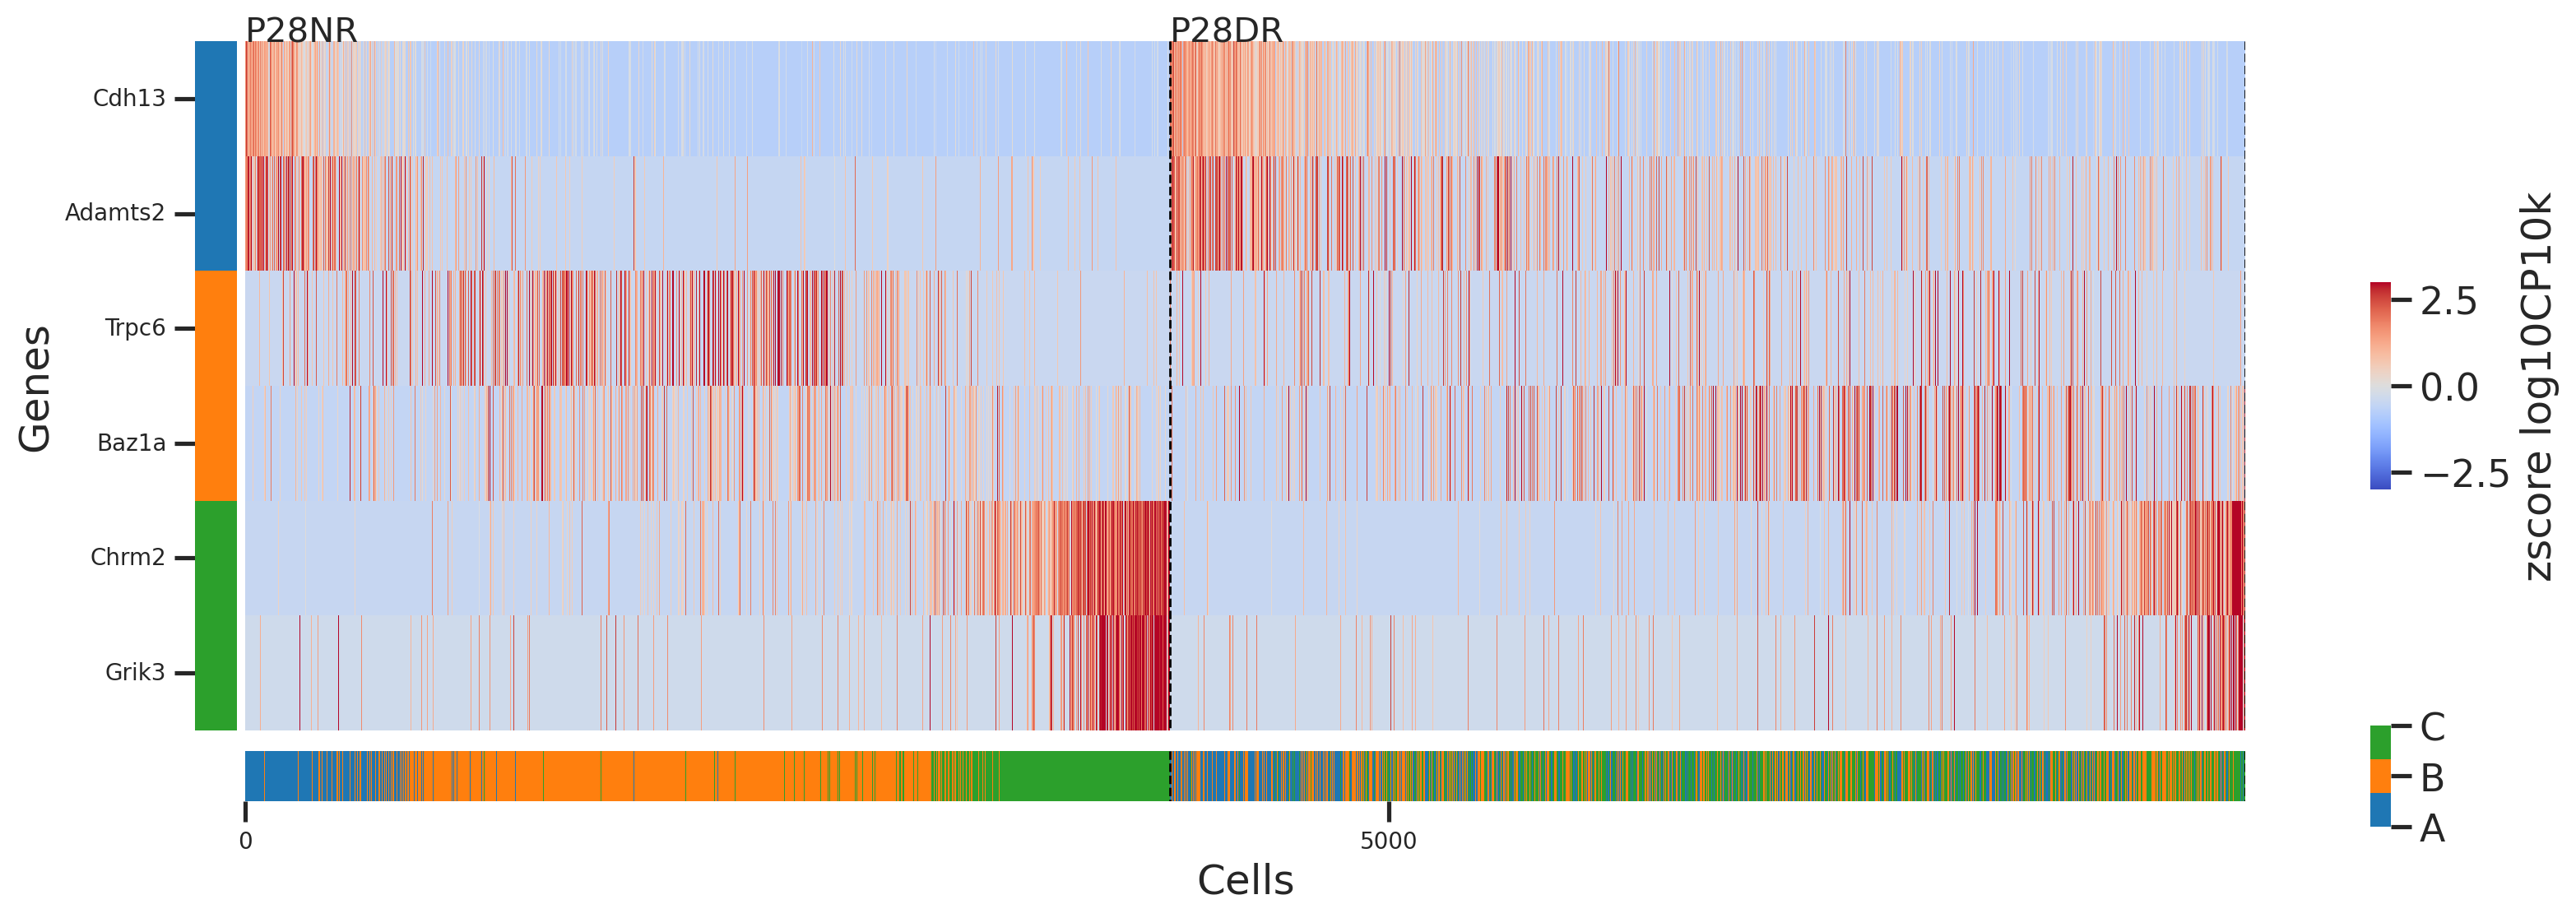

In [28]:
fig, axdict = plot(bigmat[:,gidx_subsel], np.arange(len(bigmat)), 
                   np.arange(len(genes_subsel)), bigtypes, genes_grp_subsel, "", 
                   figsize=(20,6), xticklabels=5000, yticklabels=genes_subsel, hratio=50)

axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# Ephs and Ephrins

In [28]:
adata

AnnData object with n_obs × n_vars = 8748 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond', 'easitype', 'umap1', 'umap2', 'easisamp'
    obsm: 'X_pca'
    layers: 'log10CP10k', 'zlog10CP10k'

In [29]:
adata_raw

View of AnnData object with n_obs × n_vars = 8748 × 53801
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond'

In [30]:
genes_new = [
    'Cdh13', 
    'Adamts2', 
    
    'Trpc6', 
    'Baz1a', 
    
    'Chrm2', 
    'Grik3', 
    
    # ephs
    'Epha1', 'Epha2', 'Epha3', 'Epha4', 'Epha5', 'Epha6', 'Epha7', 'Epha8', 'Epha10', 
    'Ephb1', 'Ephb2', 'Ephb3', 'Ephb4', 'Ephb6',
    
    # ephrins
    'Efna1', 'Efna2', 'Efna3', 'Efna4', 'Efna5', 
    'Efnb1', 'Efnb2', 'Efnb3',
    
#     'Nr4a2', 'Nr4a3', 'Fos', 'Arl5b', 
#     'Col19a1', 'Scube1', 'Ptchd4', 'Nell1',
    ]
gi2 = basicu.get_index_from_array(allgenes, genes_new)
assert np.all(gi2 != -1)

In [31]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigsamps = []
ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    
    ftrs_sub  = adata_raw[cells_sub].X
    cov = np.ravel(ftrs_sub.sum(axis=1))
    ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi2].todense())/cov.reshape(-1,1)*1e4+1)
    
    # order cells
    types   = adata_sub.obs['easitype'].values
    samps   = adata_sub.obs['easisamp'].values
    cellidx = np.argsort(dfall_sub['ptime'].values)
    
    bigmat.append(ftrs_sub[cellidx])
    bigtypes.append(types[cellidx])
    bigsamps.append(samps[cellidx])
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigmat = zscore(bigmat, axis=0)
bigtypes = np.hstack(bigtypes)
bigsamps = np.hstack(bigsamps)
bigmat.shape

(8748, 28)

[-3.76587486 -0.83365703  1.80365415 52.53087234]


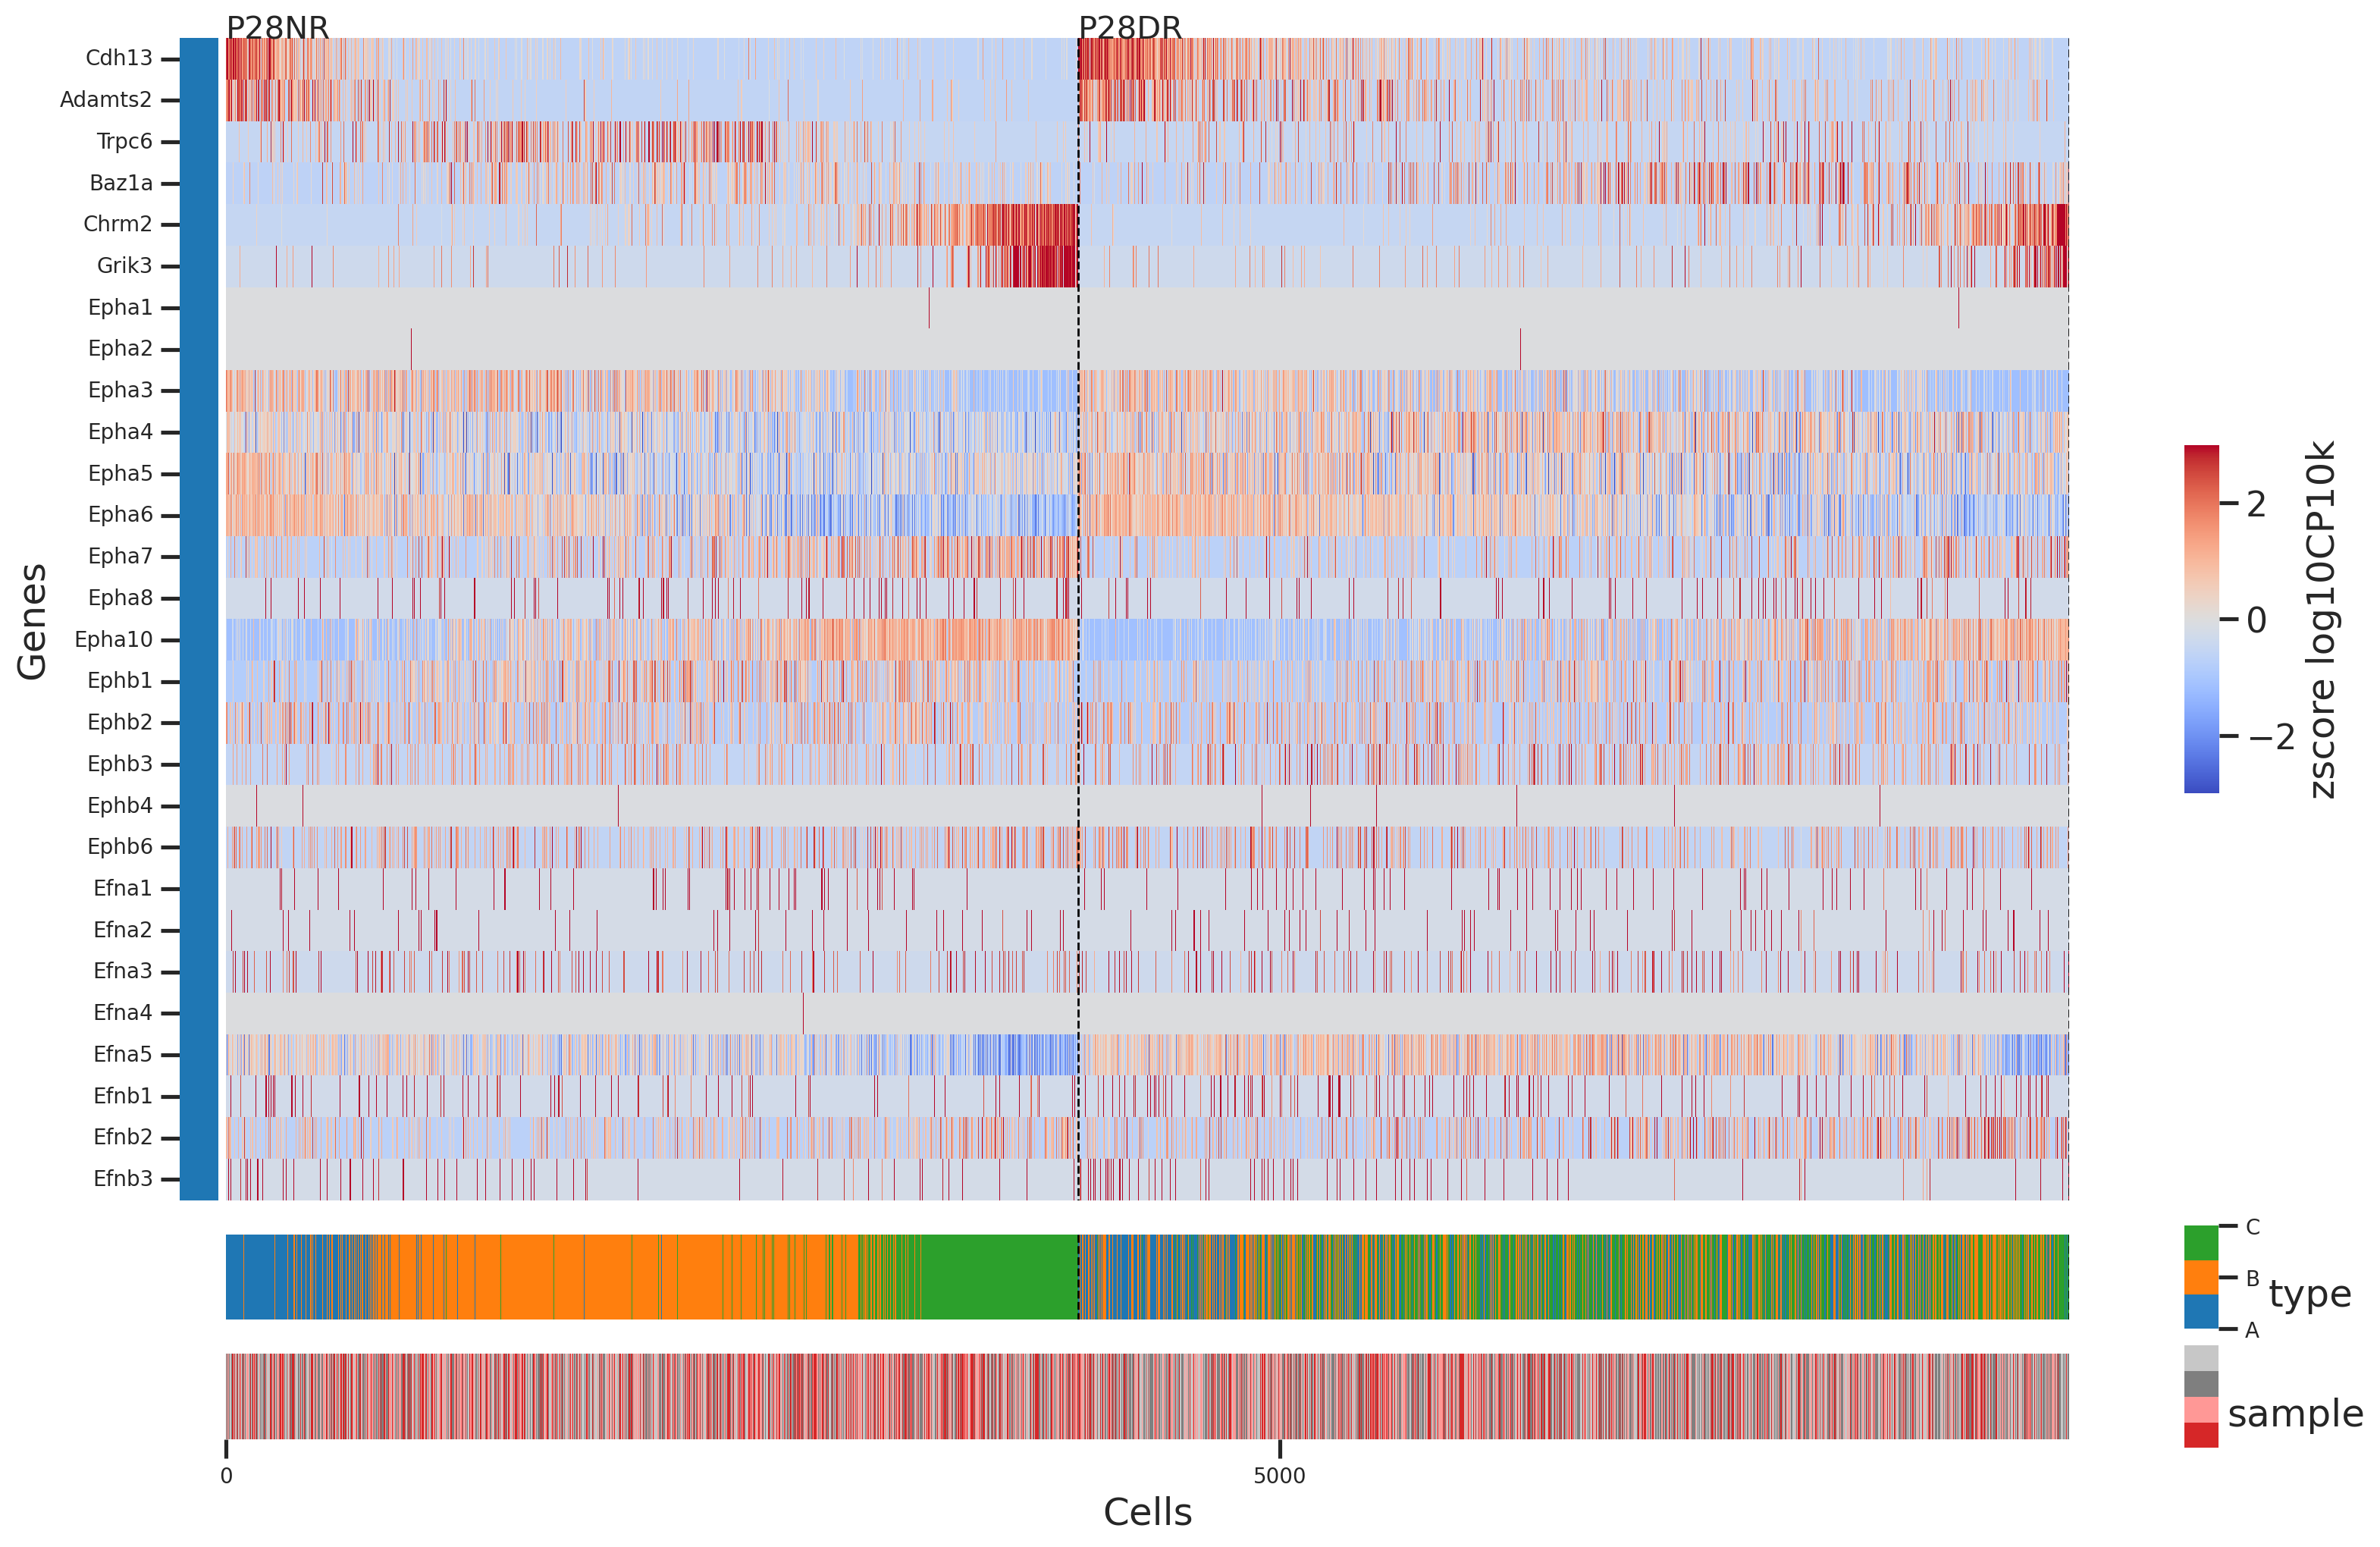

In [32]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot2(bigmat, np.arange(len(bigmat)), np.arange(bigmat.shape[1]), bigtypes, 
                    np.array(['A']*len(genes_new)), "", bigsamps, 
                   figsize=(20,12), xticklabels=5000, yticklabels=genes_new, hratio=50) # , vmax=None, vmin=None, vcenter=None)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# DR regulated genes

In [33]:
adata

AnnData object with n_obs × n_vars = 8748 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond', 'easitype', 'umap1', 'umap2', 'easisamp'
    obsm: 'X_pca'
    layers: 'log10CP10k', 'zlog10CP10k'

In [34]:
adata_raw

View of AnnData object with n_obs × n_vars = 8748 × 53801
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond'

In [35]:
genes_new = [
    'Igfn1', 'Col26a1', 'Nell1', 'Col11a1', 'Hkdc1', 'Olfm3', 'Golim4',
    'Lemd1', 'Clmp', 'Neu2', 'Mei1', 'Cpne9', 'Slc24a3', 'Etl4',
    'Sgpp2', 'Epb41', 'Pcsk5', 'Tmem232', 'Astn2', 'Ntn4', 'Afap1l1',
    'Zfp618', 'Npr3', '3632451O06Rik', 'Arhgap42', 'Heg1', 'Vwc2l',
    'Tmem117', 'Kcnk13', 'Airn', 'Ttc28', 'Col23a1', 'Cdh13', 'Glis3',
    'Iqgap2', 'Nckap5', 'Cpne6', '1700086L19Rik', 'Otof', 'Pcdh19',
    'Sema6a', 'Gm42722', 'Gabrg3', 'Grm8', 'Palm2', 'Syt17', 'Kctd8',
    'Nefm', 'Cbln2', 'Ell2', 'Npas4', 'Bdnf', 'Nptx2', 'Myh9', 'Scg3',
]
    
#     'Cdh13', 
#     'Adamts2', 
    
#     'Trpc6', 
#     'Baz1a', 
    
#     'Chrm2', 
#     'Grik3', 
    
#     'Nr4a2', 'Nr4a3', 'Fos', 'Arl5b', 
#     'Col19a1', 'Scube1', 'Ptchd4', 'Nell1',
    
gi2 = basicu.get_index_from_array(allgenes, genes_new)
assert np.all(gi2 != -1)

In [36]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigsamps = []
ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    
    ftrs_sub  = adata_raw[cells_sub].X
    cov = np.ravel(ftrs_sub.sum(axis=1))
    ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi2].todense())/cov.reshape(-1,1)*1e4+1)
    
    # order cells
    types   = adata_sub.obs['easitype'].values
    samps   = adata_sub.obs['easisamp'].values
    cellidx = np.argsort(dfall_sub['ptime'].values)
    
    bigmat.append(ftrs_sub[cellidx])
    bigtypes.append(types[cellidx])
    bigsamps.append(samps[cellidx])
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigmat = zscore(bigmat, axis=0)
bigtypes = np.hstack(bigtypes)
bigsamps = np.hstack(bigsamps)
bigmat.shape

(8748, 55)

[-1.99308205 -0.85225546  2.10884256  9.06771469]


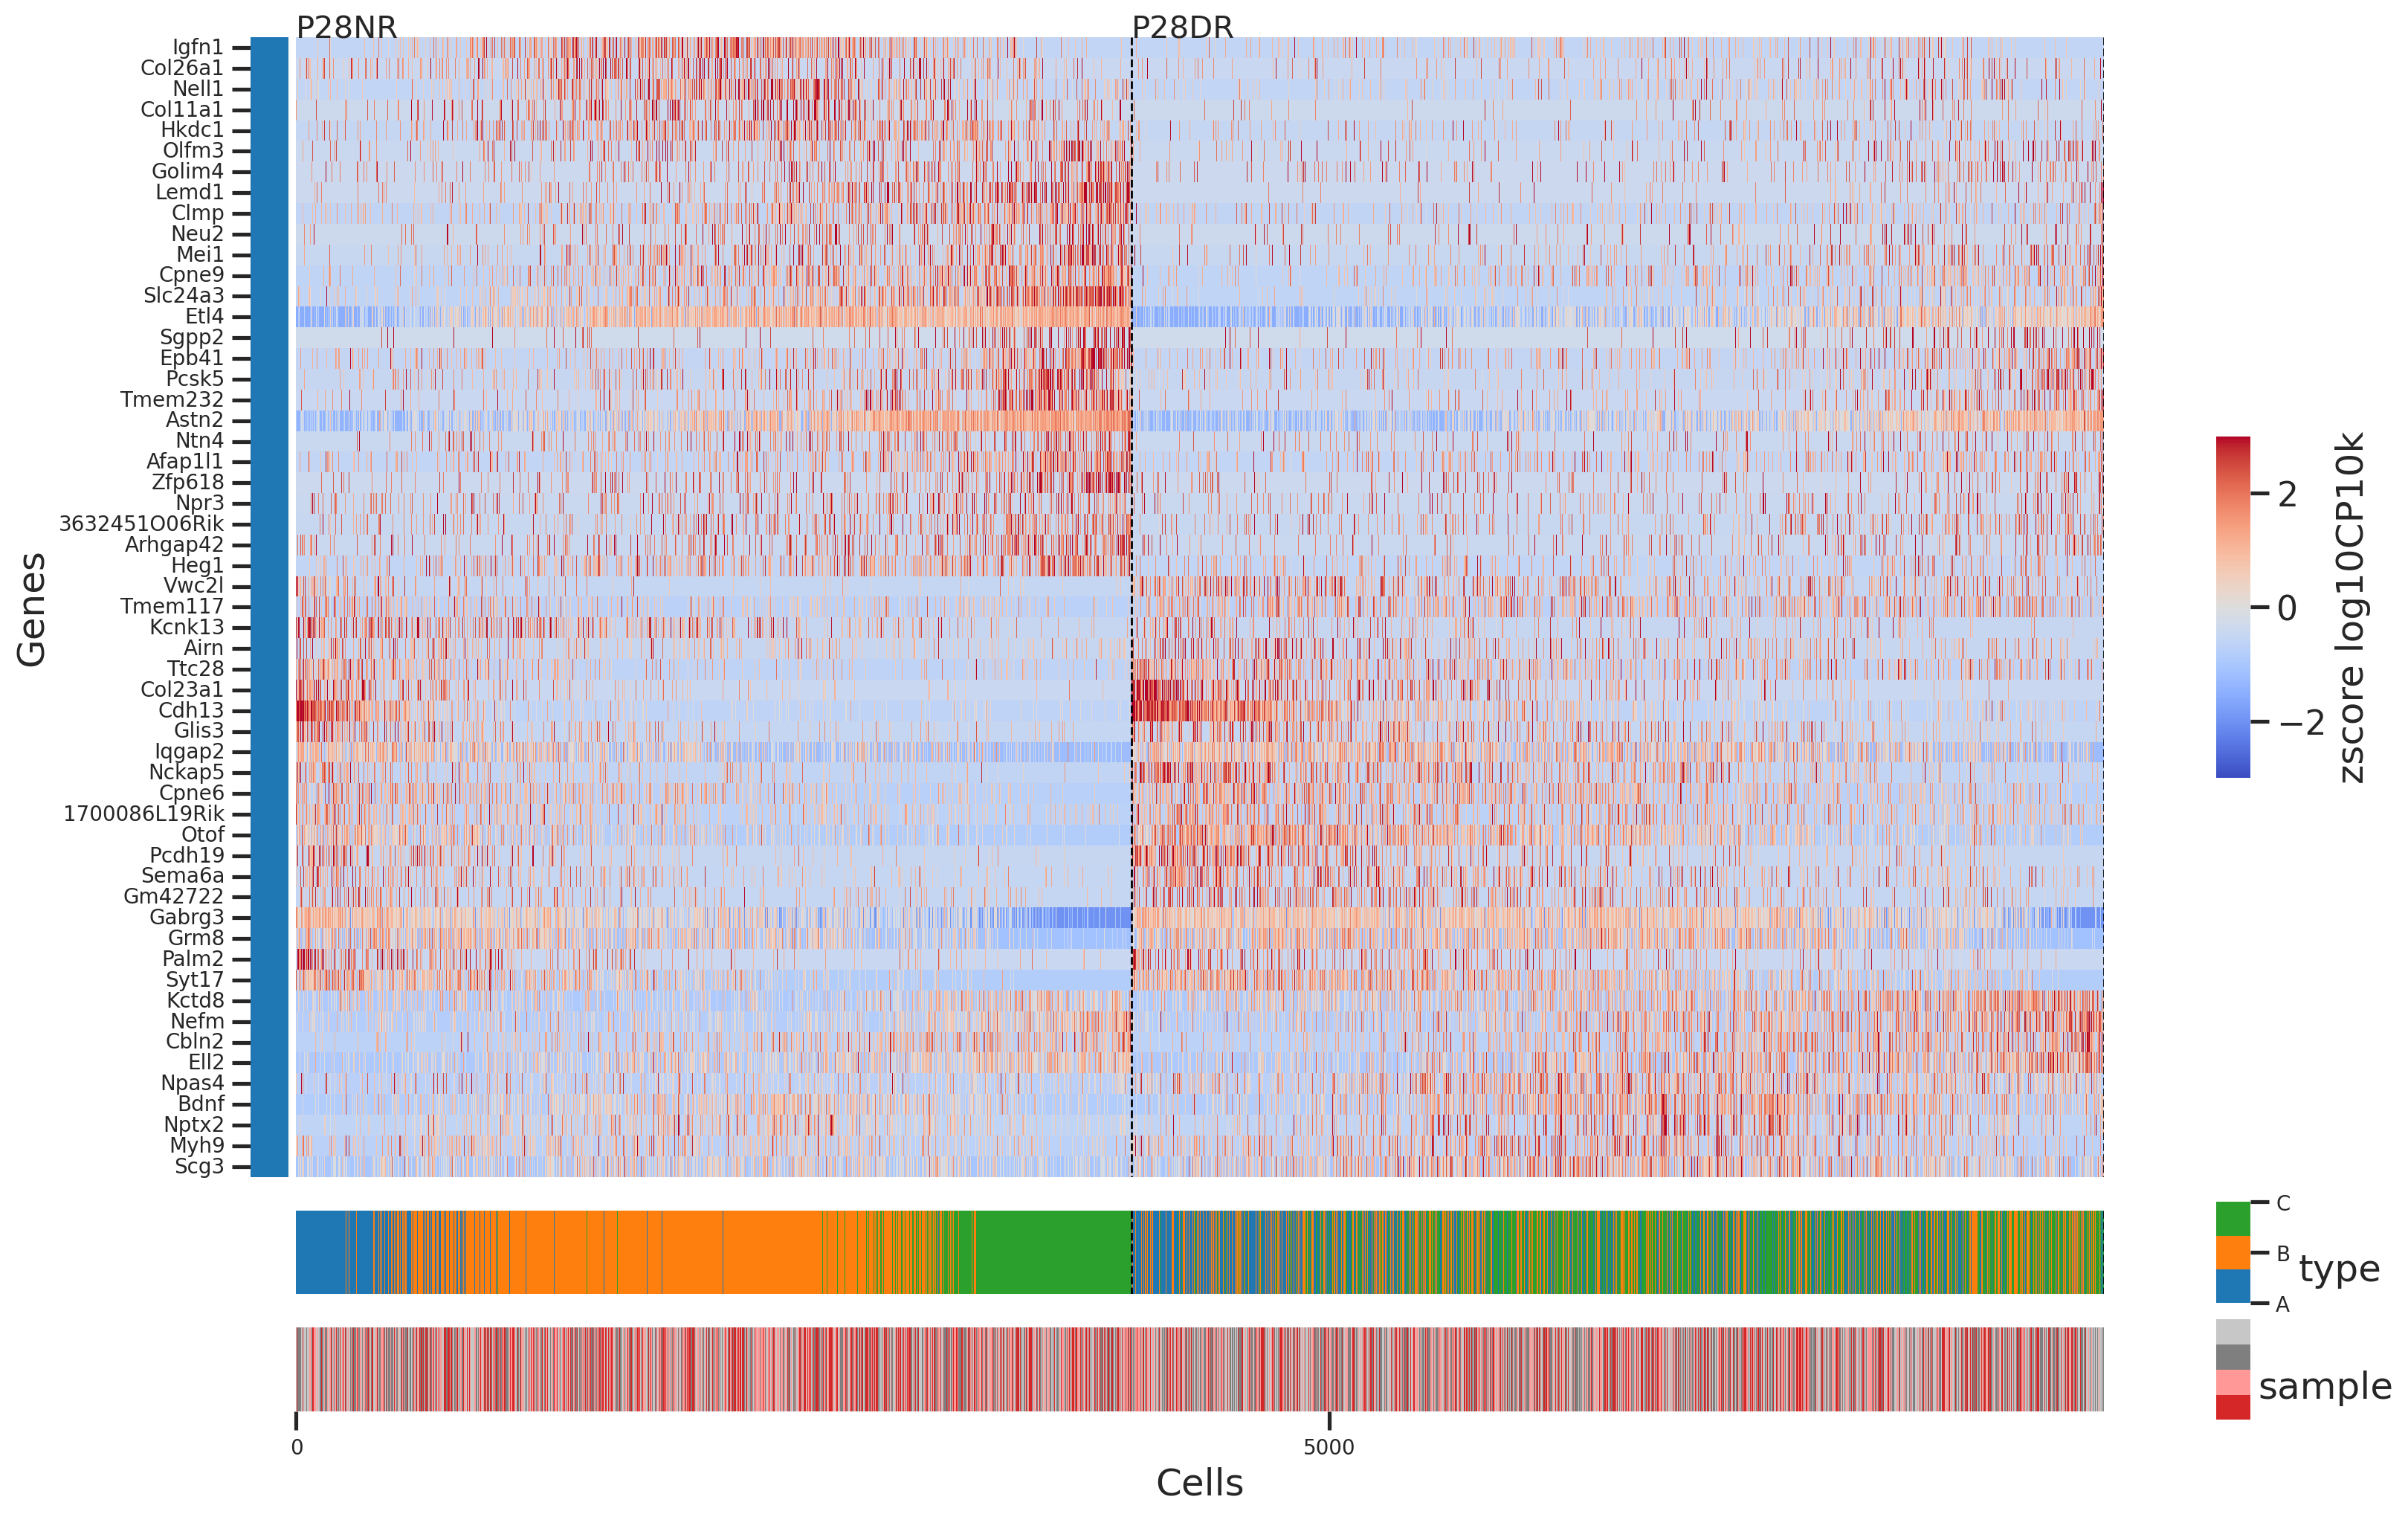

In [37]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot2(bigmat, np.arange(len(bigmat)), np.arange(bigmat.shape[1]), bigtypes, 
                    np.array(['A']*len(genes_new)), "", bigsamps, 
                   figsize=(20,12), xticklabels=5000, yticklabels=genes_new, hratio=50) # , vmax=None, vmin=None, vcenter=None)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# DR regulated genes - reordered

In [38]:
genes_new = [
    'Igfn1', 'Col26a1', 'Nell1', 'Col11a1', 'Hkdc1', 'Olfm3', 'Golim4',
    'Lemd1', 'Clmp', 'Neu2', 'Mei1', 'Cpne9', 'Slc24a3', 'Etl4',
    'Sgpp2', 'Epb41', 'Pcsk5', 'Tmem232', 'Astn2', 'Ntn4', 'Afap1l1',
    'Zfp618', 'Npr3', '3632451O06Rik', 'Arhgap42', 'Heg1', 'Vwc2l',
    'Tmem117', 'Kcnk13', 'Airn', 'Ttc28', 'Col23a1', 'Cdh13', 'Glis3',
    'Iqgap2', 'Nckap5', 'Cpne6', '1700086L19Rik', 'Otof', 'Pcdh19',
    'Sema6a', 'Gm42722', 'Gabrg3', 'Grm8', 'Palm2', 'Syt17', 'Kctd8',
    'Nefm', 'Cbln2', 'Ell2', 'Npas4', 'Bdnf', 'Nptx2', 'Myh9', 'Scg3',
]
    
# reorder it according to GPT    
genes_new = gpt_df.set_index('gene').loc[genes_new].sort_values('gene_ptime').index.values
gi2 = basicu.get_index_from_array(allgenes, genes_new)
assert np.all(gi2 != -1)

In [39]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigsamps = []
ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    
    ftrs_sub  = adata_raw[cells_sub].X
    cov = np.ravel(ftrs_sub.sum(axis=1))
    ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi2].todense())/cov.reshape(-1,1)*1e4+1)
    
    # order cells
    types   = adata_sub.obs['easitype'].values
    samps   = adata_sub.obs['easisamp'].values
    cellidx = np.argsort(dfall_sub['ptime'].values)
    
    bigmat.append(ftrs_sub[cellidx])
    bigtypes.append(types[cellidx])
    bigsamps.append(samps[cellidx])
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigmat = zscore(bigmat, axis=0)
bigtypes = np.hstack(bigtypes)
bigsamps = np.hstack(bigsamps)
bigmat.shape

(8748, 55)

[-1.99308205 -0.85225546  2.10884256  9.06771469]


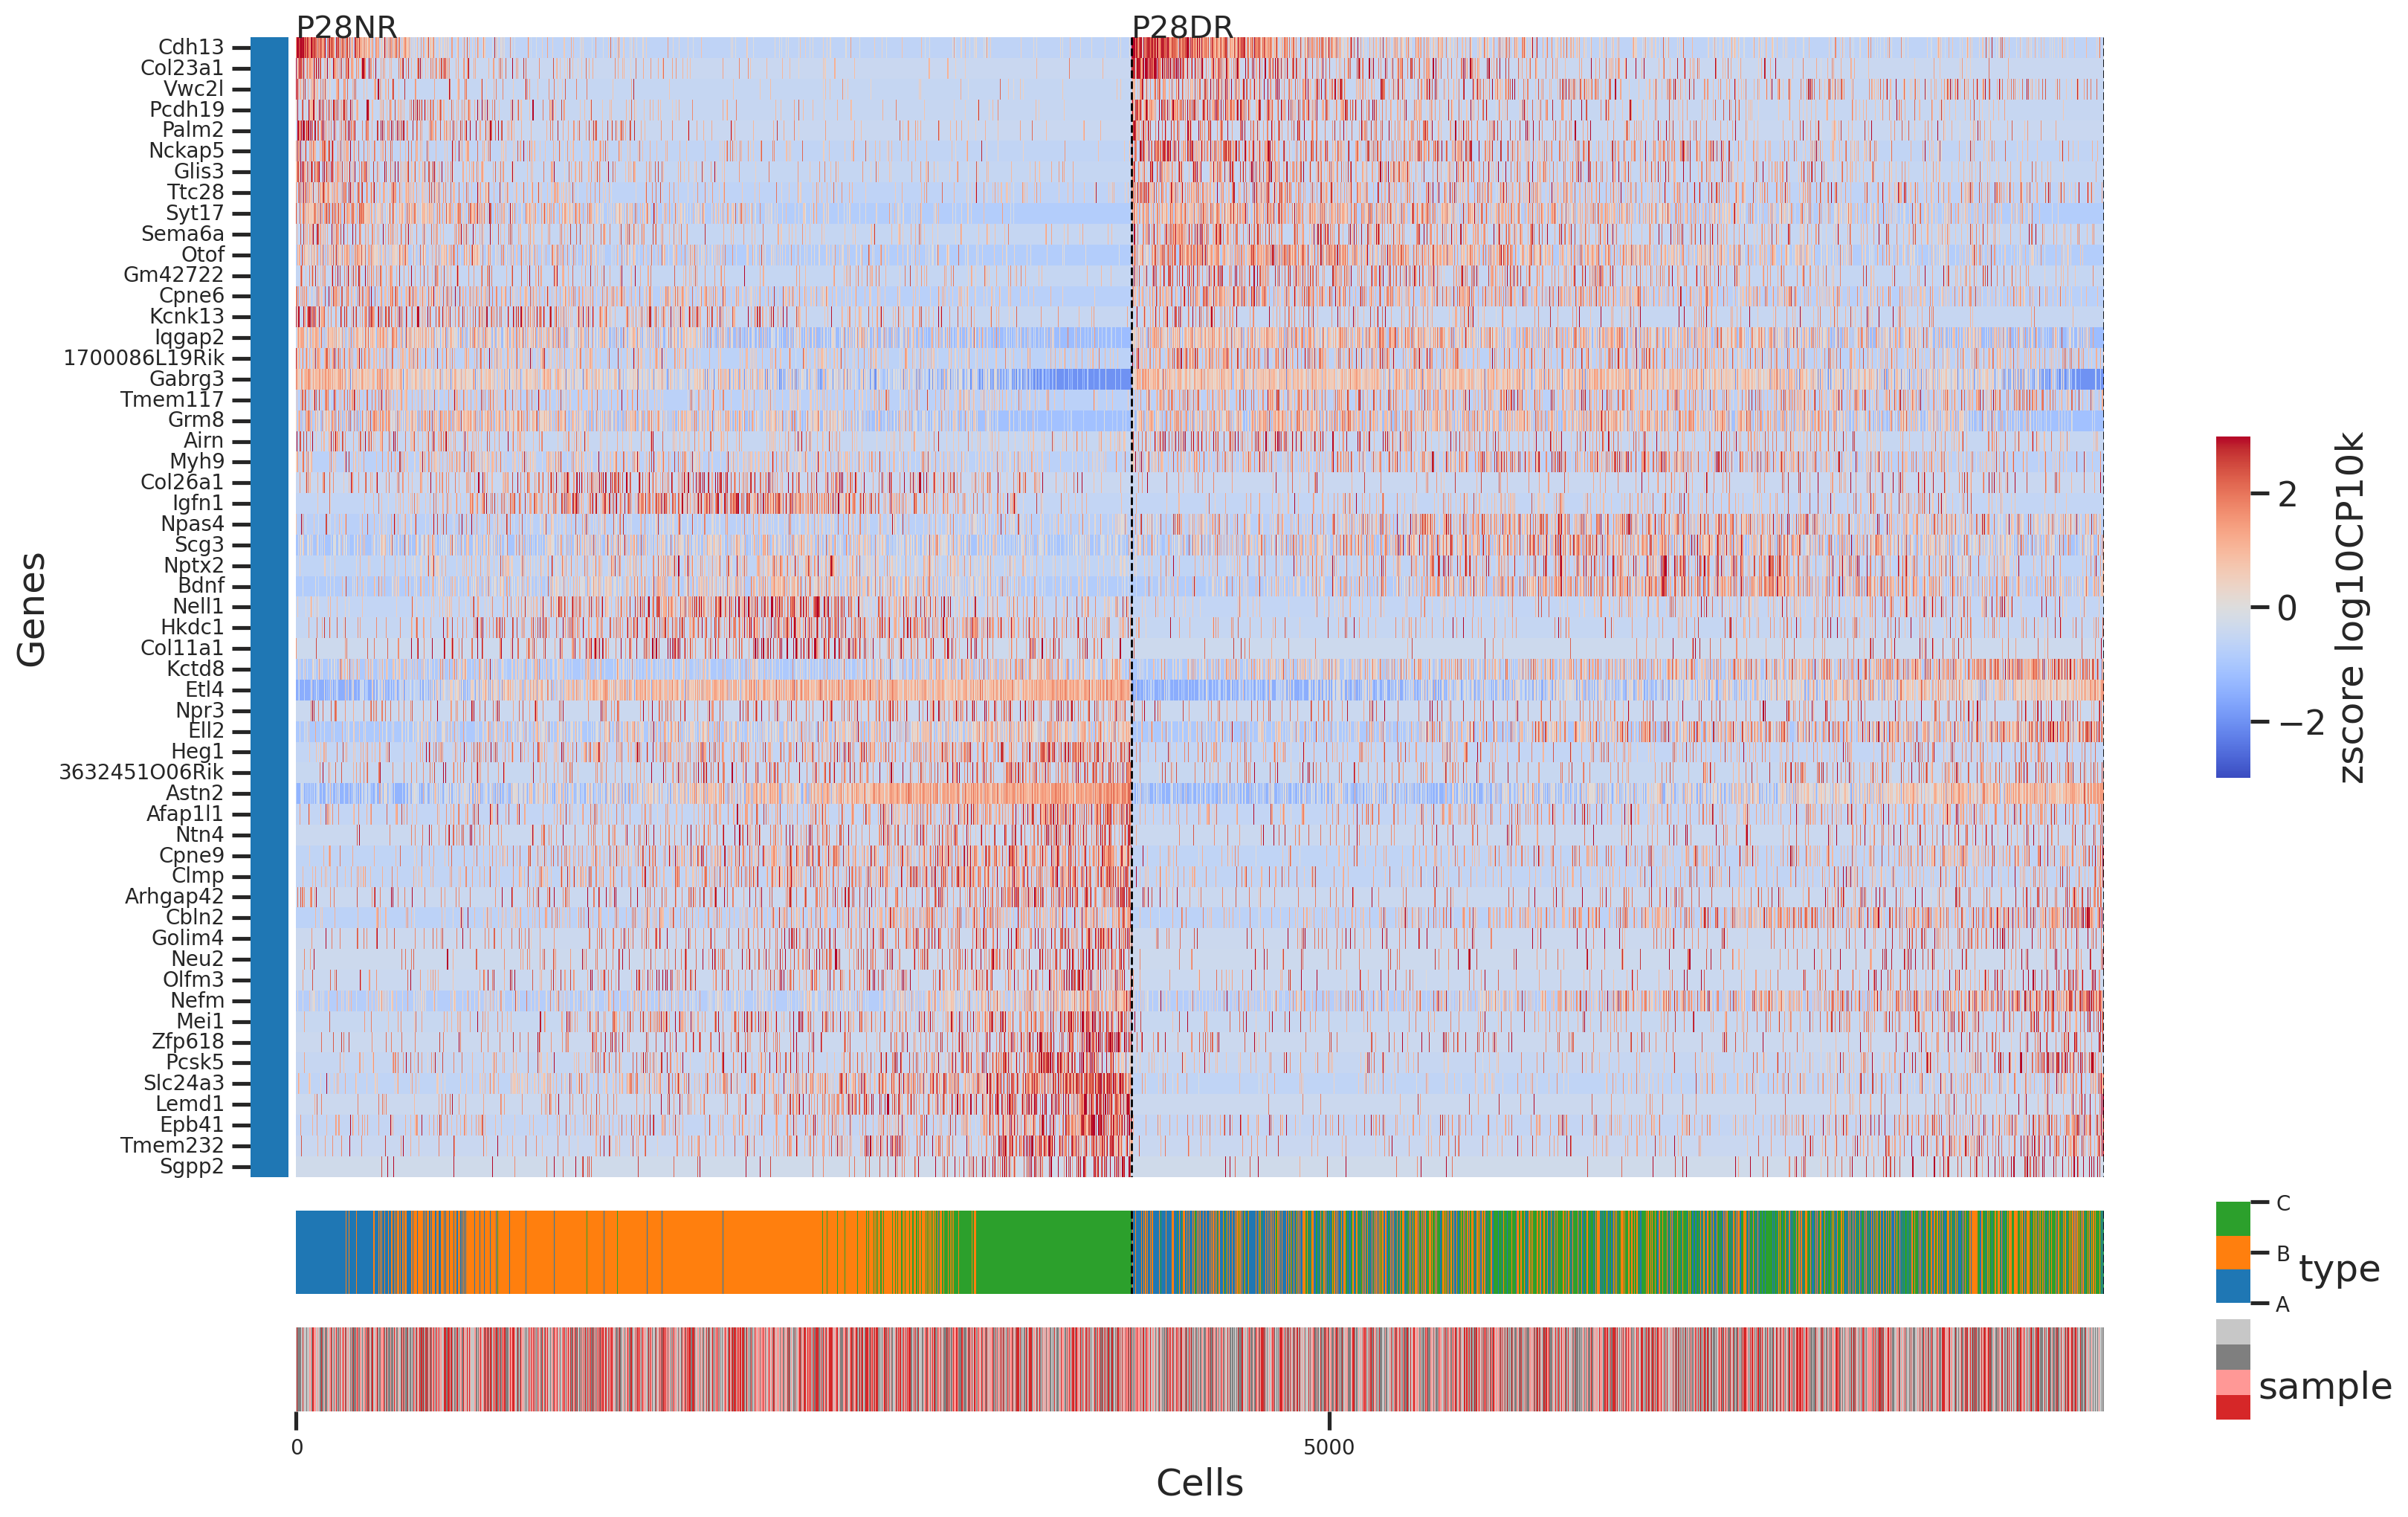

In [40]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot2(bigmat, np.arange(len(bigmat)), np.arange(bigmat.shape[1]), bigtypes, 
                    np.array(['A']*len(genes_new)), "", bigsamps, 
                   figsize=(20,12), xticklabels=5000, yticklabels=genes_new, hratio=50) # , vmax=None, vmin=None, vcenter=None)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# non-DR regulated genes - reordered

In [41]:
genes_new = [
    'Igfn1', 'Col26a1', 'Nell1', 'Col11a1', 'Hkdc1', 'Olfm3', 'Golim4',
    'Lemd1', 'Clmp', 'Neu2', 'Mei1', 'Cpne9', 'Slc24a3', 'Etl4',
    'Sgpp2', 'Epb41', 'Pcsk5', 'Tmem232', 'Astn2', 'Ntn4', 'Afap1l1',
    'Zfp618', 'Npr3', '3632451O06Rik', 'Arhgap42', 'Heg1', 'Vwc2l',
    'Tmem117', 'Kcnk13', 'Airn', 'Ttc28', 'Col23a1', 'Cdh13', 'Glis3',
    'Iqgap2', 'Nckap5', 'Cpne6', '1700086L19Rik', 'Otof', 'Pcdh19',
    'Sema6a', 'Gm42722', 'Gabrg3', 'Grm8', 'Palm2', 'Syt17', 'Kctd8',
    'Nefm', 'Cbln2', 'Ell2', 'Npas4', 'Bdnf', 'Nptx2', 'Myh9', 'Scg3',
]
non_drgenes = [g for g in gpt_df['gene'] if g not in genes_new]
genes_new = non_drgenes
    
# reorder it according to GPT    
genes_new = gpt_df.set_index('gene').loc[genes_new].sort_values('gene_ptime').index.values
gi2 = basicu.get_index_from_array(allgenes, genes_new)
assert np.all(gi2 != -1)

In [42]:
genes_new

array(['Met', '6530403H02Rik', 'Rhbdl3', 'Adamts2', 'Raver2', 'Syt10',
       'Spon1', 'Kcnn3', 'Arhgef28', 'Scml4', 'Ikzf2', 'Dpyd', 'Gpc5',
       'Slc6a7', 'Crispld1', 'Igsf11', 'Tenm1', 'Robo1', 'Adamts16',
       'Eda', 'Gm4876', 'Mgat4c', 'Glra3', 'Wdr66', 'Nov', 'Hap1', 'Tox3',
       'Cemip', 'Itga8', 'Wnt4', 'Sdk2', 'Pdzrn4', 'Plxnd1', 'Atp2b4',
       'Prkcg', 'Adcy10', 'Pnck', 'Zbtb20', 'Ryr3', 'Necab1', 'Ypel1',
       'Camk2d', 'Mmd2', 'Nfia', 'Pdgfc', 'Rasal1', 'Map2k6', 'Gab2',
       'Dscaml1', 'Reln', 'Npas3', 'Galnt17', 'Cntn5', 'Ly6h',
       'B230303A05Rik', 'Cys1', 'Ripor2', 'Rfx3', 'Slc7a14', 'Ust',
       'Grm1', 'Kirrel3', 'Epha3', 'March4', 'Sez6', 'Frmd4b', 'Prkag2',
       'Rgs8', 'Adcyap1r1', 'Nfib', 'Fkbp5', 'Wwc2', 'Acvr2a', 'Gtf2ird1',
       'Ccdc85a', 'Sox5', 'Zfp608', 'Grk3', 'Zfp804b', 'Crim1', 'Meis2',
       'Gpc6', 'C130026L21Rik', 'Mpp6', 'Tmeff1', 'Sh3gl3', 'Mdga1',
       'Slc16a2', 'Fam126a', 'Tiam1', 'Grb14', 'Nkain3', 'Gm35835',
       'Fam21

In [43]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigsamps = []
ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    
    ftrs_sub  = adata_raw[cells_sub].X
    cov = np.ravel(ftrs_sub.sum(axis=1))
    ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi2].todense())/cov.reshape(-1,1)*1e4+1)
    
    # order cells
    types   = adata_sub.obs['easitype'].values
    samps   = adata_sub.obs['easisamp'].values
    cellidx = np.argsort(dfall_sub['ptime'].values)
    
    bigmat.append(ftrs_sub[cellidx])
    bigtypes.append(types[cellidx])
    bigsamps.append(samps[cellidx])
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigmat = zscore(bigmat, axis=0)
bigtypes = np.hstack(bigtypes)
bigsamps = np.hstack(bigsamps)
bigmat.shape

(8748, 231)

[-4.66484308 -1.05396104  1.94800305 10.49784565]


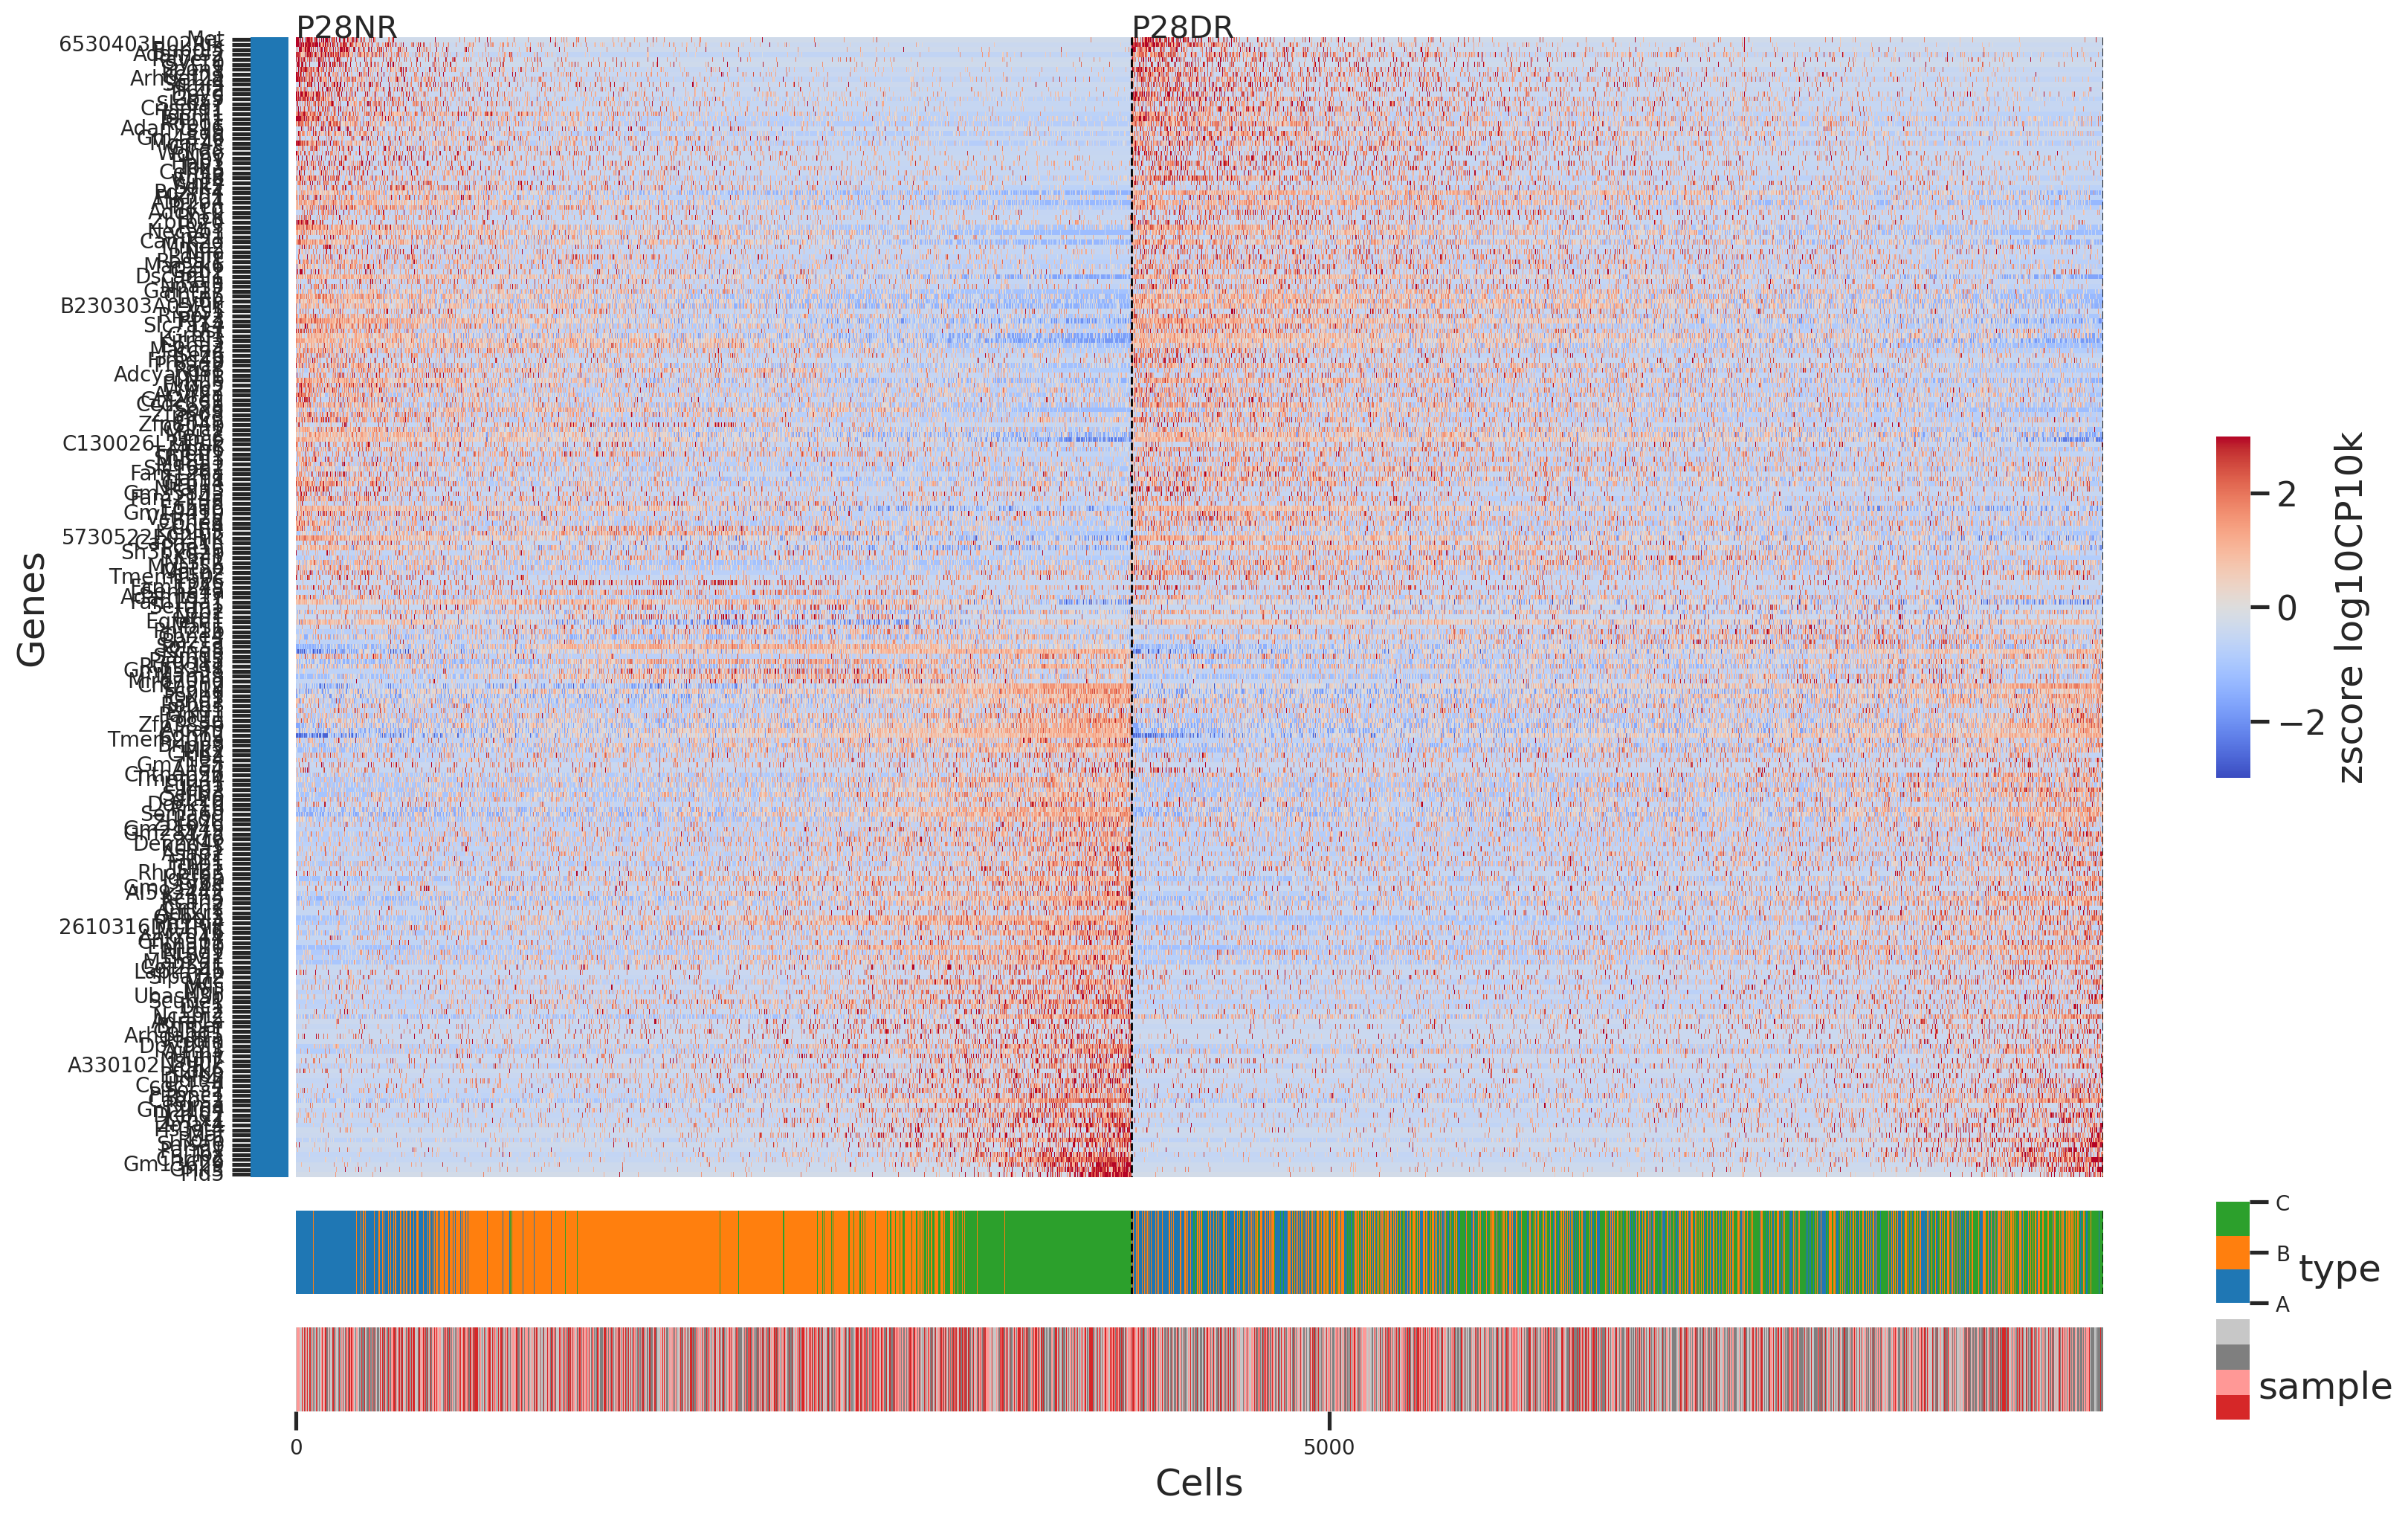

In [44]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot2(bigmat, np.arange(len(bigmat)), np.arange(bigmat.shape[1]), bigtypes, 
                    np.array(['A']*len(genes_new)), "", bigsamps, 
                   figsize=(20,12), xticklabels=5000, yticklabels=genes_new, hratio=50) # , vmax=None, vmin=None, vcenter=None)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# quantify this
- DR regulated
- non-DR regulated

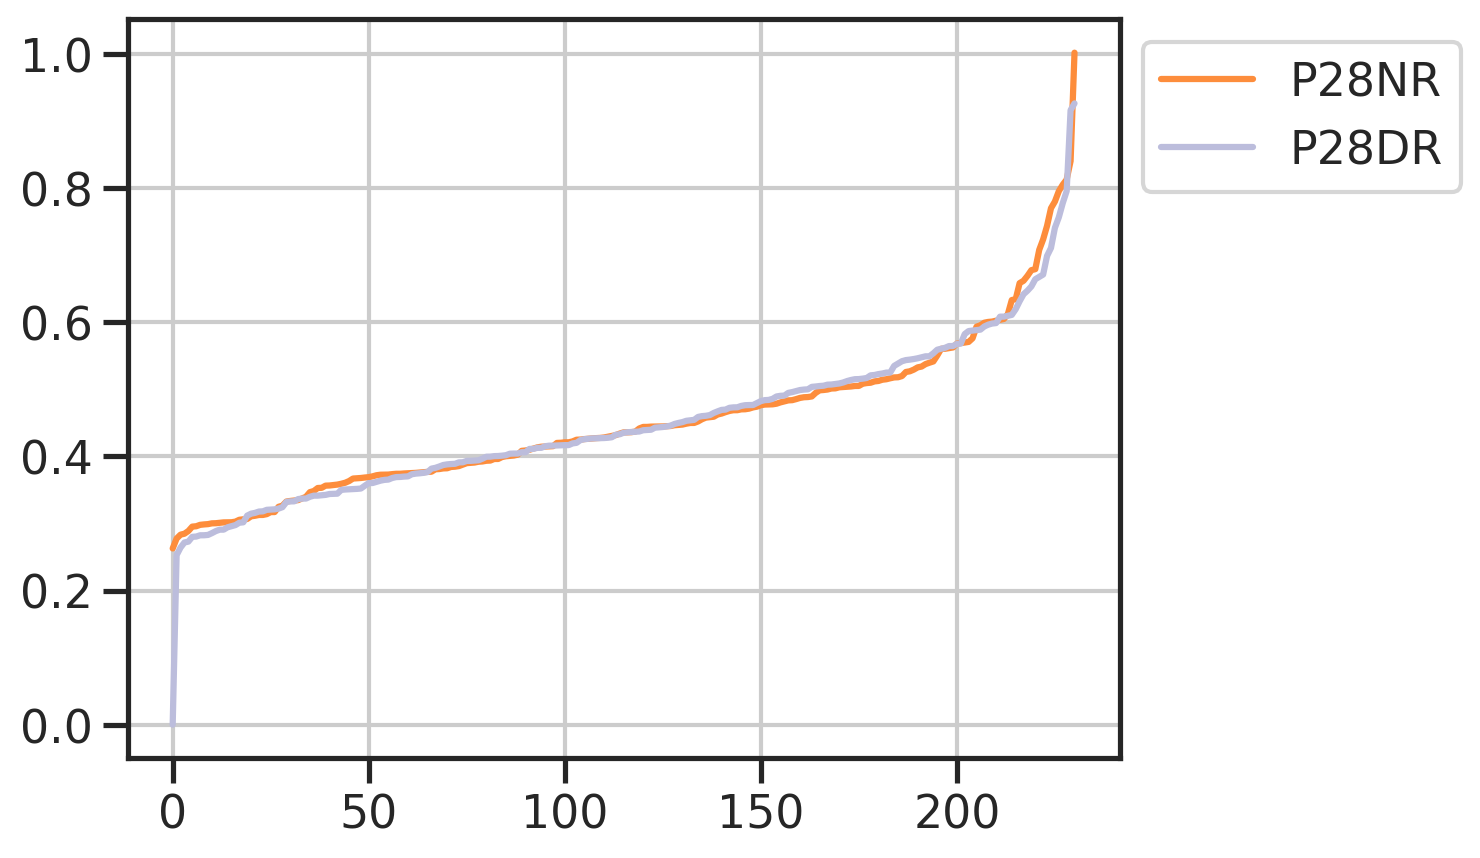

In [45]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigsamps = []
ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    
    ftrs_sub  = adata_raw[cells_sub].X
    cov = np.ravel(ftrs_sub.sum(axis=1))
    ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi2].todense())/cov.reshape(-1,1)*1e4+1)
    
    # order cells
    types   = adata_sub.obs['easitype'].values
    samps   = adata_sub.obs['easisamp'].values
    cellidx = np.argsort(dfall_sub['ptime'].values)
    
    a = ftrs_sub[cellidx]  #.shape
    diff = np.percentile(a, 95, axis=0) - np.percentile(a, 50, axis=0)

    # plt.plot(diff, color=palette[case], label=case)
    plt.plot(np.sort(diff), color=palette[case], label=case)
plt.legend(bbox_to_anchor=(1,1))

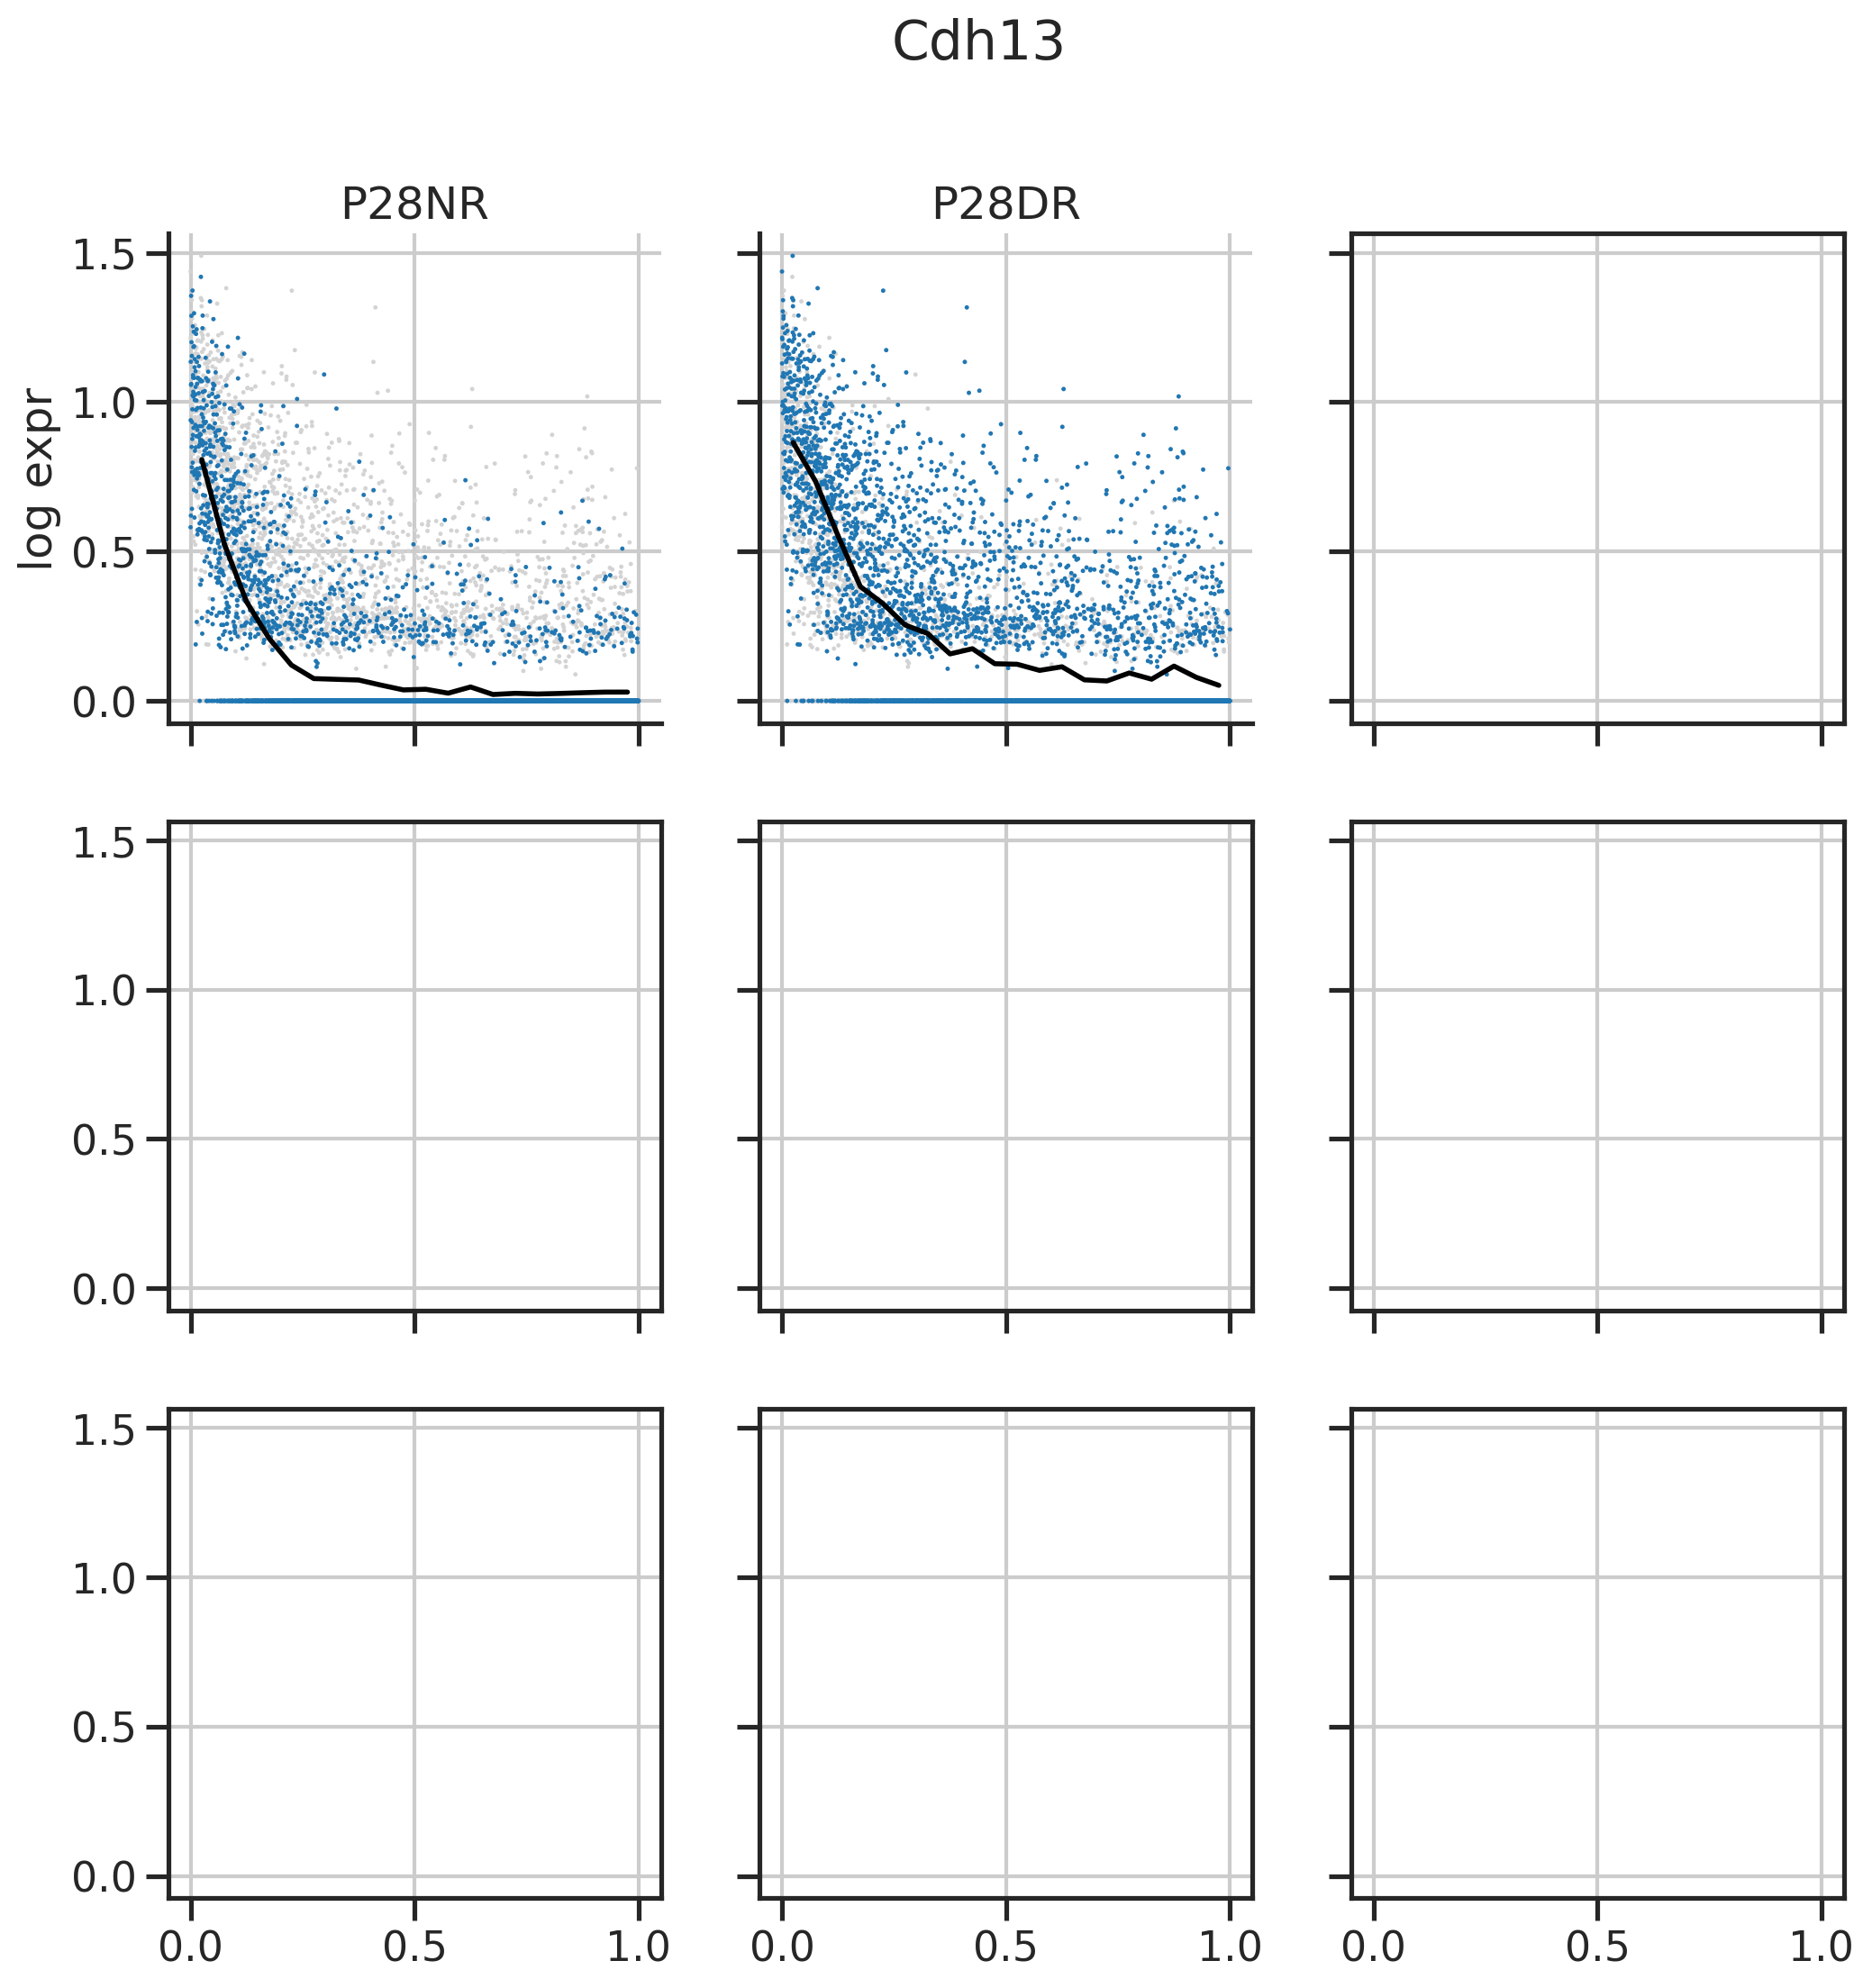

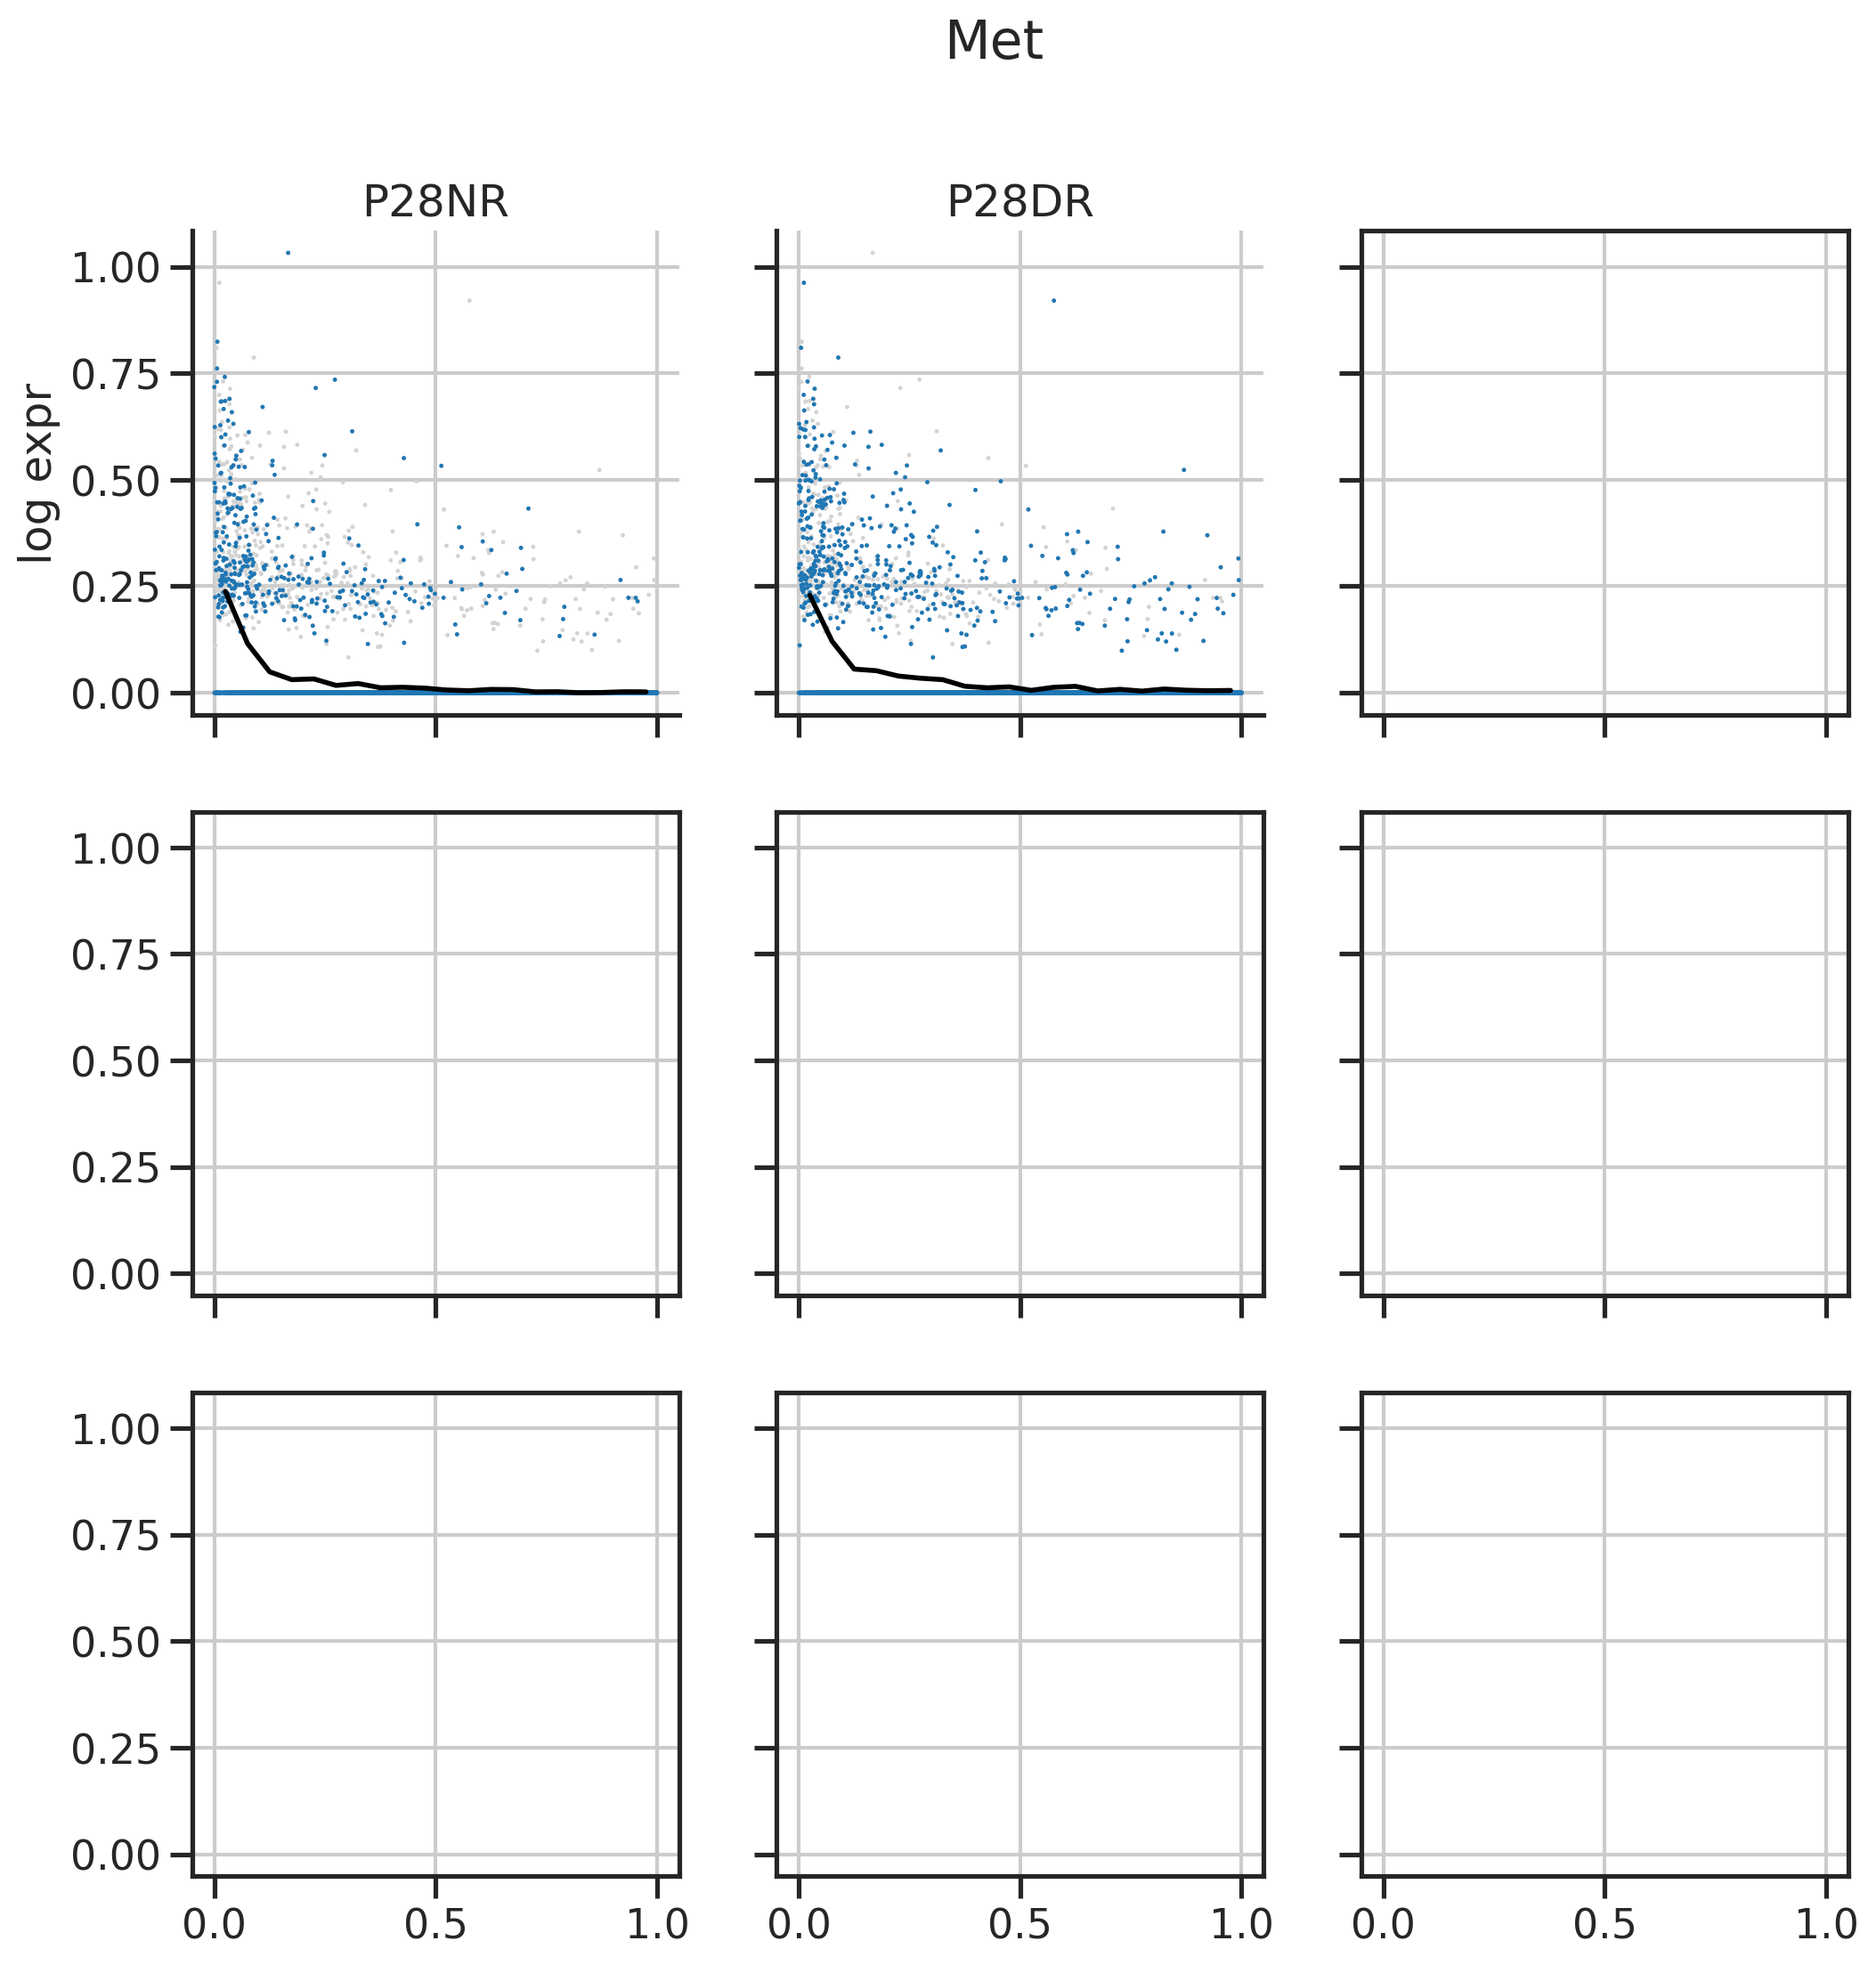

In [46]:

genes_toplot = ['Cdh13', 'Met']
for gene_toplot in genes_toplot:
    gi3 = basicu.get_index_from_array(allgenes, [gene_toplot])

    # a big table of everything
    allcells = adata.obs.index.values
    bigmat = []
    bigtypes = []
    bigsamps = []
    ncases = []

    resdict = {}
    for case in cases:
        # select cells
        adata_sub = adata[adata.obs['cond']==case]
        cells_sub = adata_sub.obs.index.values
        cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)

        dfall_sub = dfall.loc[cells_sub]

        ftrs_sub  = adata_raw[cells_sub].X
        cov = np.ravel(ftrs_sub.sum(axis=1))
        ftrs_sub  = np.log10(np.asarray(ftrs_sub[:,gi3].todense())/cov.reshape(-1,1)*1e4+1)

        # order cells
        types   = adata_sub.obs['easitype'].values
        samps   = adata_sub.obs['easisamp'].values
        cellidx = np.argsort(dfall_sub['ptime'].values)
        resdict[case] = ftrs_sub[cellidx]

    fig, axs = plt.subplots(3,3,figsize=(4*3,4*3),sharex=True, sharey=True)
    for i, (ax, case) in enumerate(zip(axs.flat, cases)):
        for _case in cases:
            a = resdict[_case]
            ax.scatter(np.linspace(0, 1, len(a)), a, s=3, edgecolor='none', color='lightgray')

        a = resdict[case]
        ax.scatter(np.linspace(0, 1, len(a)), a, s=3, edgecolor='none', label=case)
        _df = pd.DataFrame()
        _df['x'] = np.linspace(0, 1, len(a))
        _df['y'] = a[:,0]
        _df['xbin'] = pd.cut(_df['x'], 20)
        _df = _df.groupby('xbin').mean()
        ax.plot(_df['x'], _df['y'], label=case, color='k', linewidth=2)

        ax.set_title(case)
        sns.despine(ax=ax)

        if i % 3 == 0: 
            ax.set_ylabel('log expr')
        if i // 3 == 2:
            ax.set_xlabel('L2/3 grad ranking')
    fig.suptitle(gene_toplot)